In [32]:
import pandas as pd
import csv
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats import skew, kurtosis
from  sklearn.preprocessing import  MinMaxScaler

import matplotlib.pyplot as plt
import scipy.stats as stats
from cliffs_delta import cliffs_delta


In [31]:
! pip install cliffs_delta

In [2]:
def rm_outlier(df,featurename,per=0.01):
    lower_bound = df[feature].quantile(per)
    upper_bound = df[feature].quantile(1-per)
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

In [3]:
def normalization (df_concat):
    all_features = list(df_concat.columns)
    remove_eles = ['label']
    for ele in remove_eles:    
        all_features.remove(ele)
    scaler = MinMaxScaler()
    # Apply normalization only to the selected columns
    df_concat[all_features] = scaler.fit_transform(df_concat[all_features])
    return df_concat

In [5]:
tubule_feature_files = glob.glob('/data/ffan4/AI_tubule/feature_data/NEPTUNE/tubule_level/*')
files = []
for file in tubule_feature_files:
    files.append(file)
df_concat = pd.concat(map(pd.read_csv, files),sort=False)

# patientids = []
# for filename in df_concat['filename']:
#     patientids.append(filename.split('/')[7])
# df_concat['biopsyID'] = patientids
# unique_bid = list(set(patientids))
df_rmotl_neptune = df_concat.copy()
# selected_features_violinplot = ['TUBULE_AREA','TBM_AREA','NUCLEI_TE+LUMEN_AREA_RATIO']
# for column in selected_features_violinplot:
#     lower_bound = df_rmotl_neptune[column].quantile(0.01)
#     upper_bound = df_rmotl_neptune[column].quantile(0.99)
#     df_rmotl_neptune = df_rmotl_neptune[(df_rmotl_neptune[column] >= lower_bound) & (df_rmotl_neptune[column] <= upper_bound)]
df_rmotl_neptune.drop(['filename','super_tubules_before_watershed','super_tubules_after_watershed'],axis=1,inplace=True)

In [6]:
files_umich = glob.glob('/data/ffan4/AI_tubule/feature_data/UMICH/tubule_level/*')
files = []
for file in files_umich:
    files.append(file)
umich_concat = pd.concat(map(pd.read_csv, files),sort=False)
df_rmotl_reference = umich_concat.copy()
df_rmotl_reference['label'] = 3
df_rmotl_reference.drop(['filename','super_tubules_before_watershed','super_tubules_after_watershed'],axis=1,inplace=True)

In [8]:
df_rmotl_neptune_reference = pd.concat([df_rmotl_neptune, df_rmotl_reference], ignore_index=True)

# Predictive features and corresponding titles

In [9]:
selected_features_violinplot =['TE_TUBULE_AREA_RATIO','TBM_THICK_AVE','TBM_THICK_MAX','TBM_AREA','NUCLEI_TE_AREA_RATIO','NUCLEI_TE+LUMEN_AREA_RATIO','NUCLEI_TBM_AREA_RATIO', 'NUCLEI_LUMEN_CENT_DIS_MIN','TE+LUMEN_SMOOTH_10',
]
# Change average area for TBM to just TBM area
correct_titles = [
'Tubular Epithelium Area / Tubular Area Ratio',
'Average Tubular Basement Membrane Thickness',
'Maximum Value For Tubular Basement Membrane Thickness',
'Area Of Tubular Basement Membranes',
'Nuclear Area / Tubular Epithelium Area Ratio',
'Nuclear Area / Tubular Epithelium + Lumen Area Ratio',
'Nuclear Area / Tubular Basement Membrane Area Ratio',
'Minimal Distance Between Center Of The Nuclei And Border Of The Lumen',
'Smoothness Of The Outer Border Of The Tubular Epithelium',
]

In [13]:
custom_palette = {
    "REFERENCE_TISSUE":"gray",
    "NON-IFTA": "blue",
    "PRE-IFTA": "green",
    "MATURE IFTA": "red"
}
df_f = df_rmotl_neptune_reference.copy()

df_neptune = df_f[df_f['label'].isin([0, 1, 2])]
df_reference = df_f[df_f['label'] == 3]
df_neptune = rm_outlier(df_neptune,feature,per=0.01)
df_reference = rm_outlier(df_reference,feature,per=0.01)
df_merged= pd.concat([df_neptune, df_reference], ignore_index=True)
#     lower_bound = df_f[feature].quantile(0.01)
#     upper_bound = df_f[feature].quantile(0.99)

#     df_f = df_f[(df_f[feature] >= lower_bound) & (df_f[feature] <= upper_bound)]
df_merged = normalization(df_merged)

In [15]:
df_noifta = df_merged[df_merged['label'] == 0]
df_preifta = df_merged[df_merged['label'] == 1]
df_matureifta = df_merged[df_merged['label'] == 2]
df_reference = df_merged[df_merged['label'] == 3]

In [17]:
import scipy.stats as stats

# Shapiro-Wilk test
stat1, p1 = stats.shapiro(noifta)
stat2, p2 = stats.shapiro(preifta)

print('Data1: Statistics=%.3f, p=%.3f' % (stat1, p1))
print('Data2: Statistics=%.3f, p=%.3f' % (stat2, p2))

# Interpret the p-value
alpha = 0.05
if p1 > alpha:
    print('Data1 looks normally distributed')
else:
    print('Data1 does not look normally distributed')

if p2 > alpha:
    print('Data2 looks normally distributed')
else:
    print('Data2 does not look normally distributed')

Data1: Statistics=0.957, p=0.000
Data2: Statistics=0.937, p=0.000
Data1 does not look normally distributed
Data2 does not look normally distributed


/usr/local/lib/python3.8/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Q-Q plot

0
Tubular Epithelium Area / Tubular Area Ratio


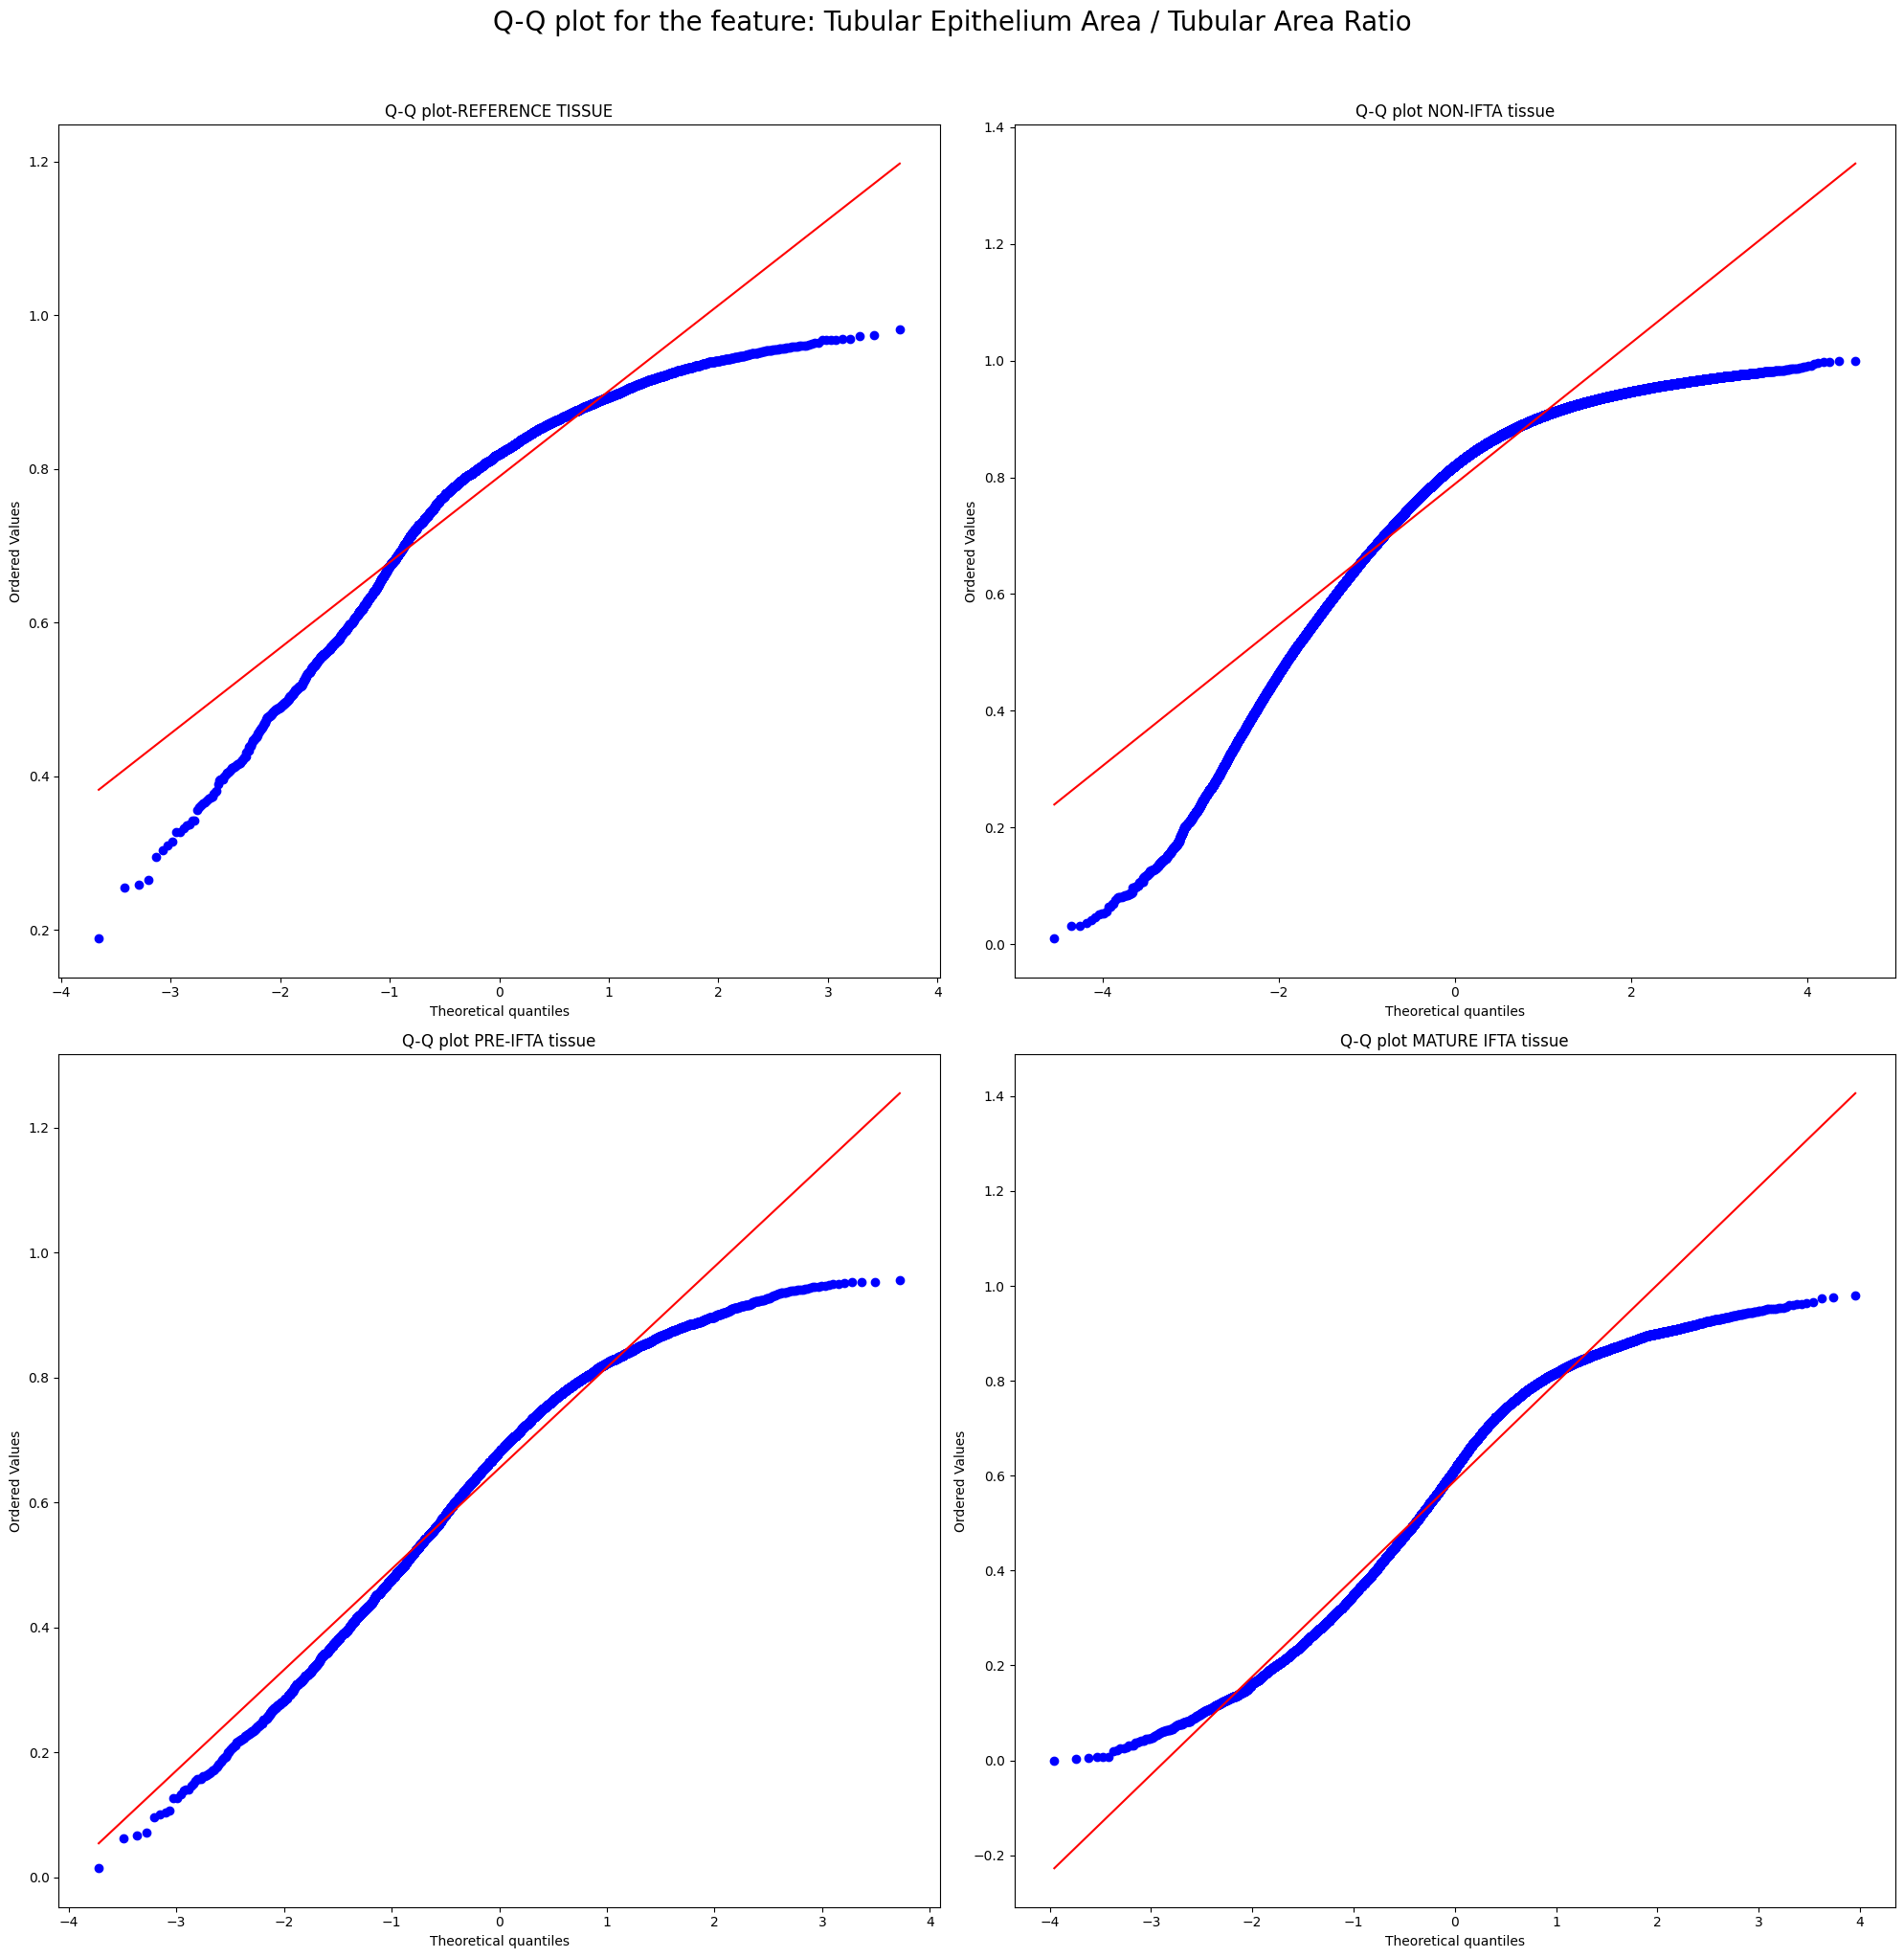

1
Average Tubular Basement Membrane Thickness


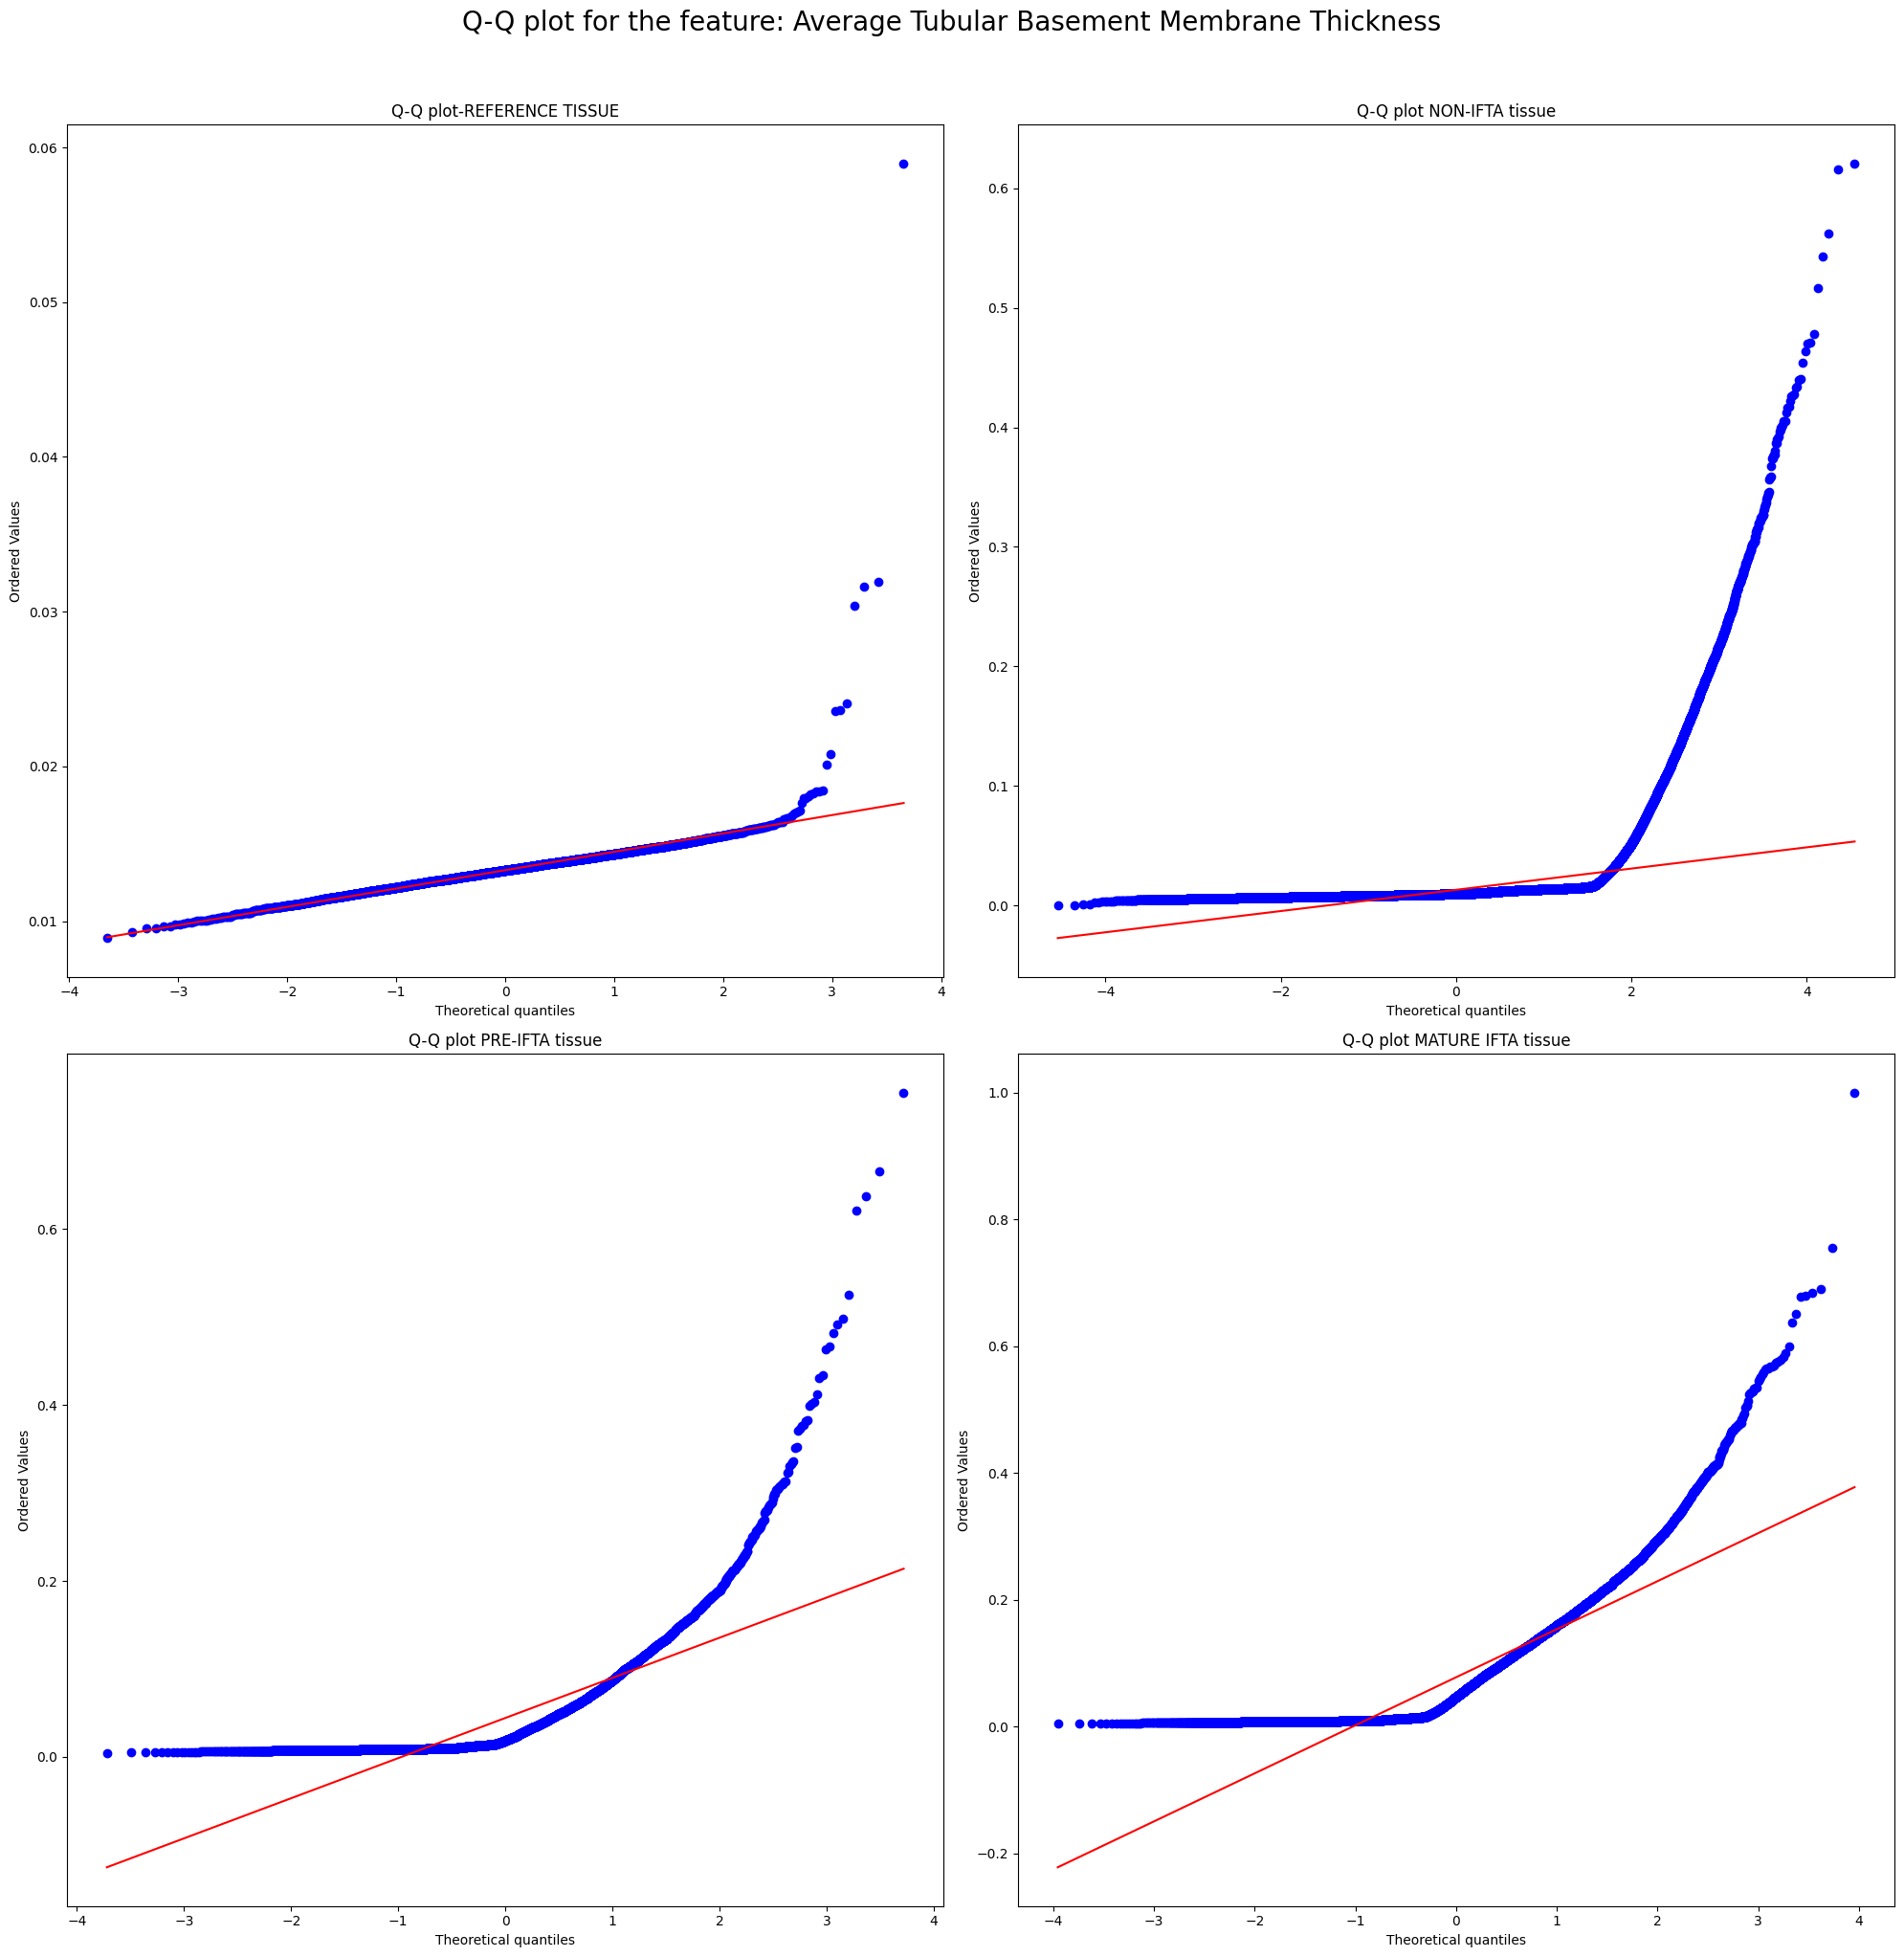

2
Maximum Value For Tubular Basement Membrane Thickness


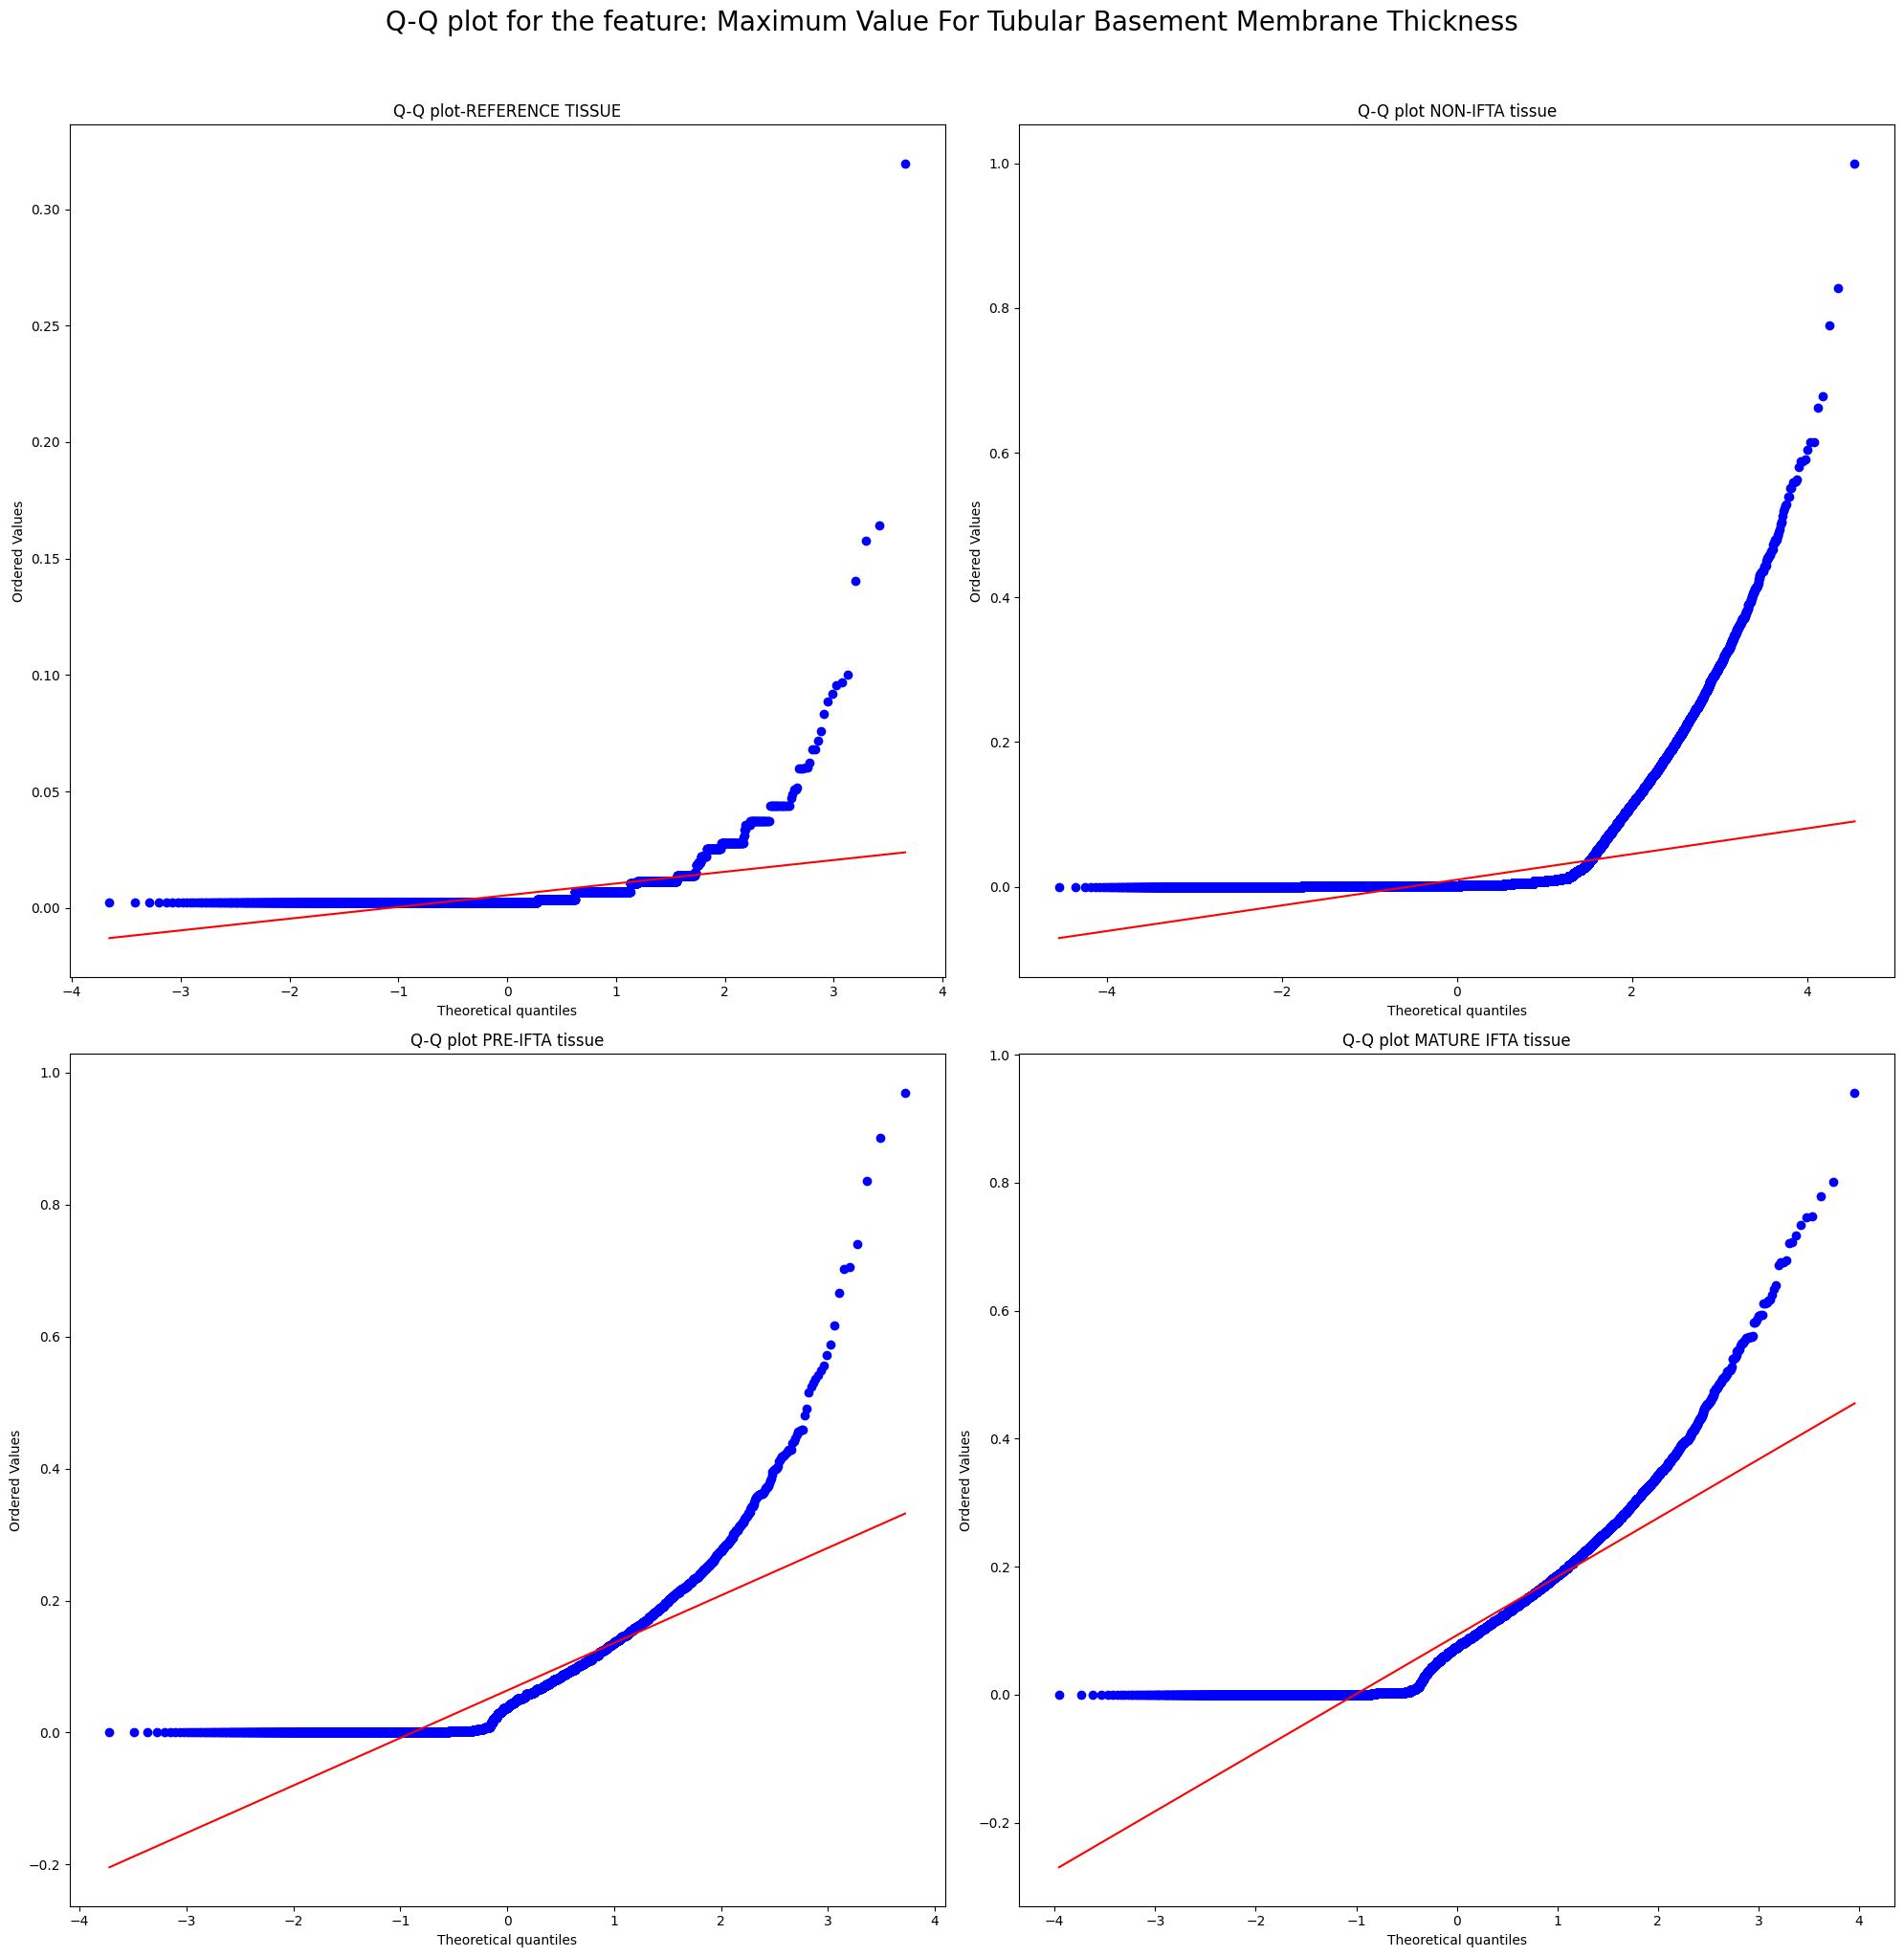

3
Area Of Tubular Basement Membranes


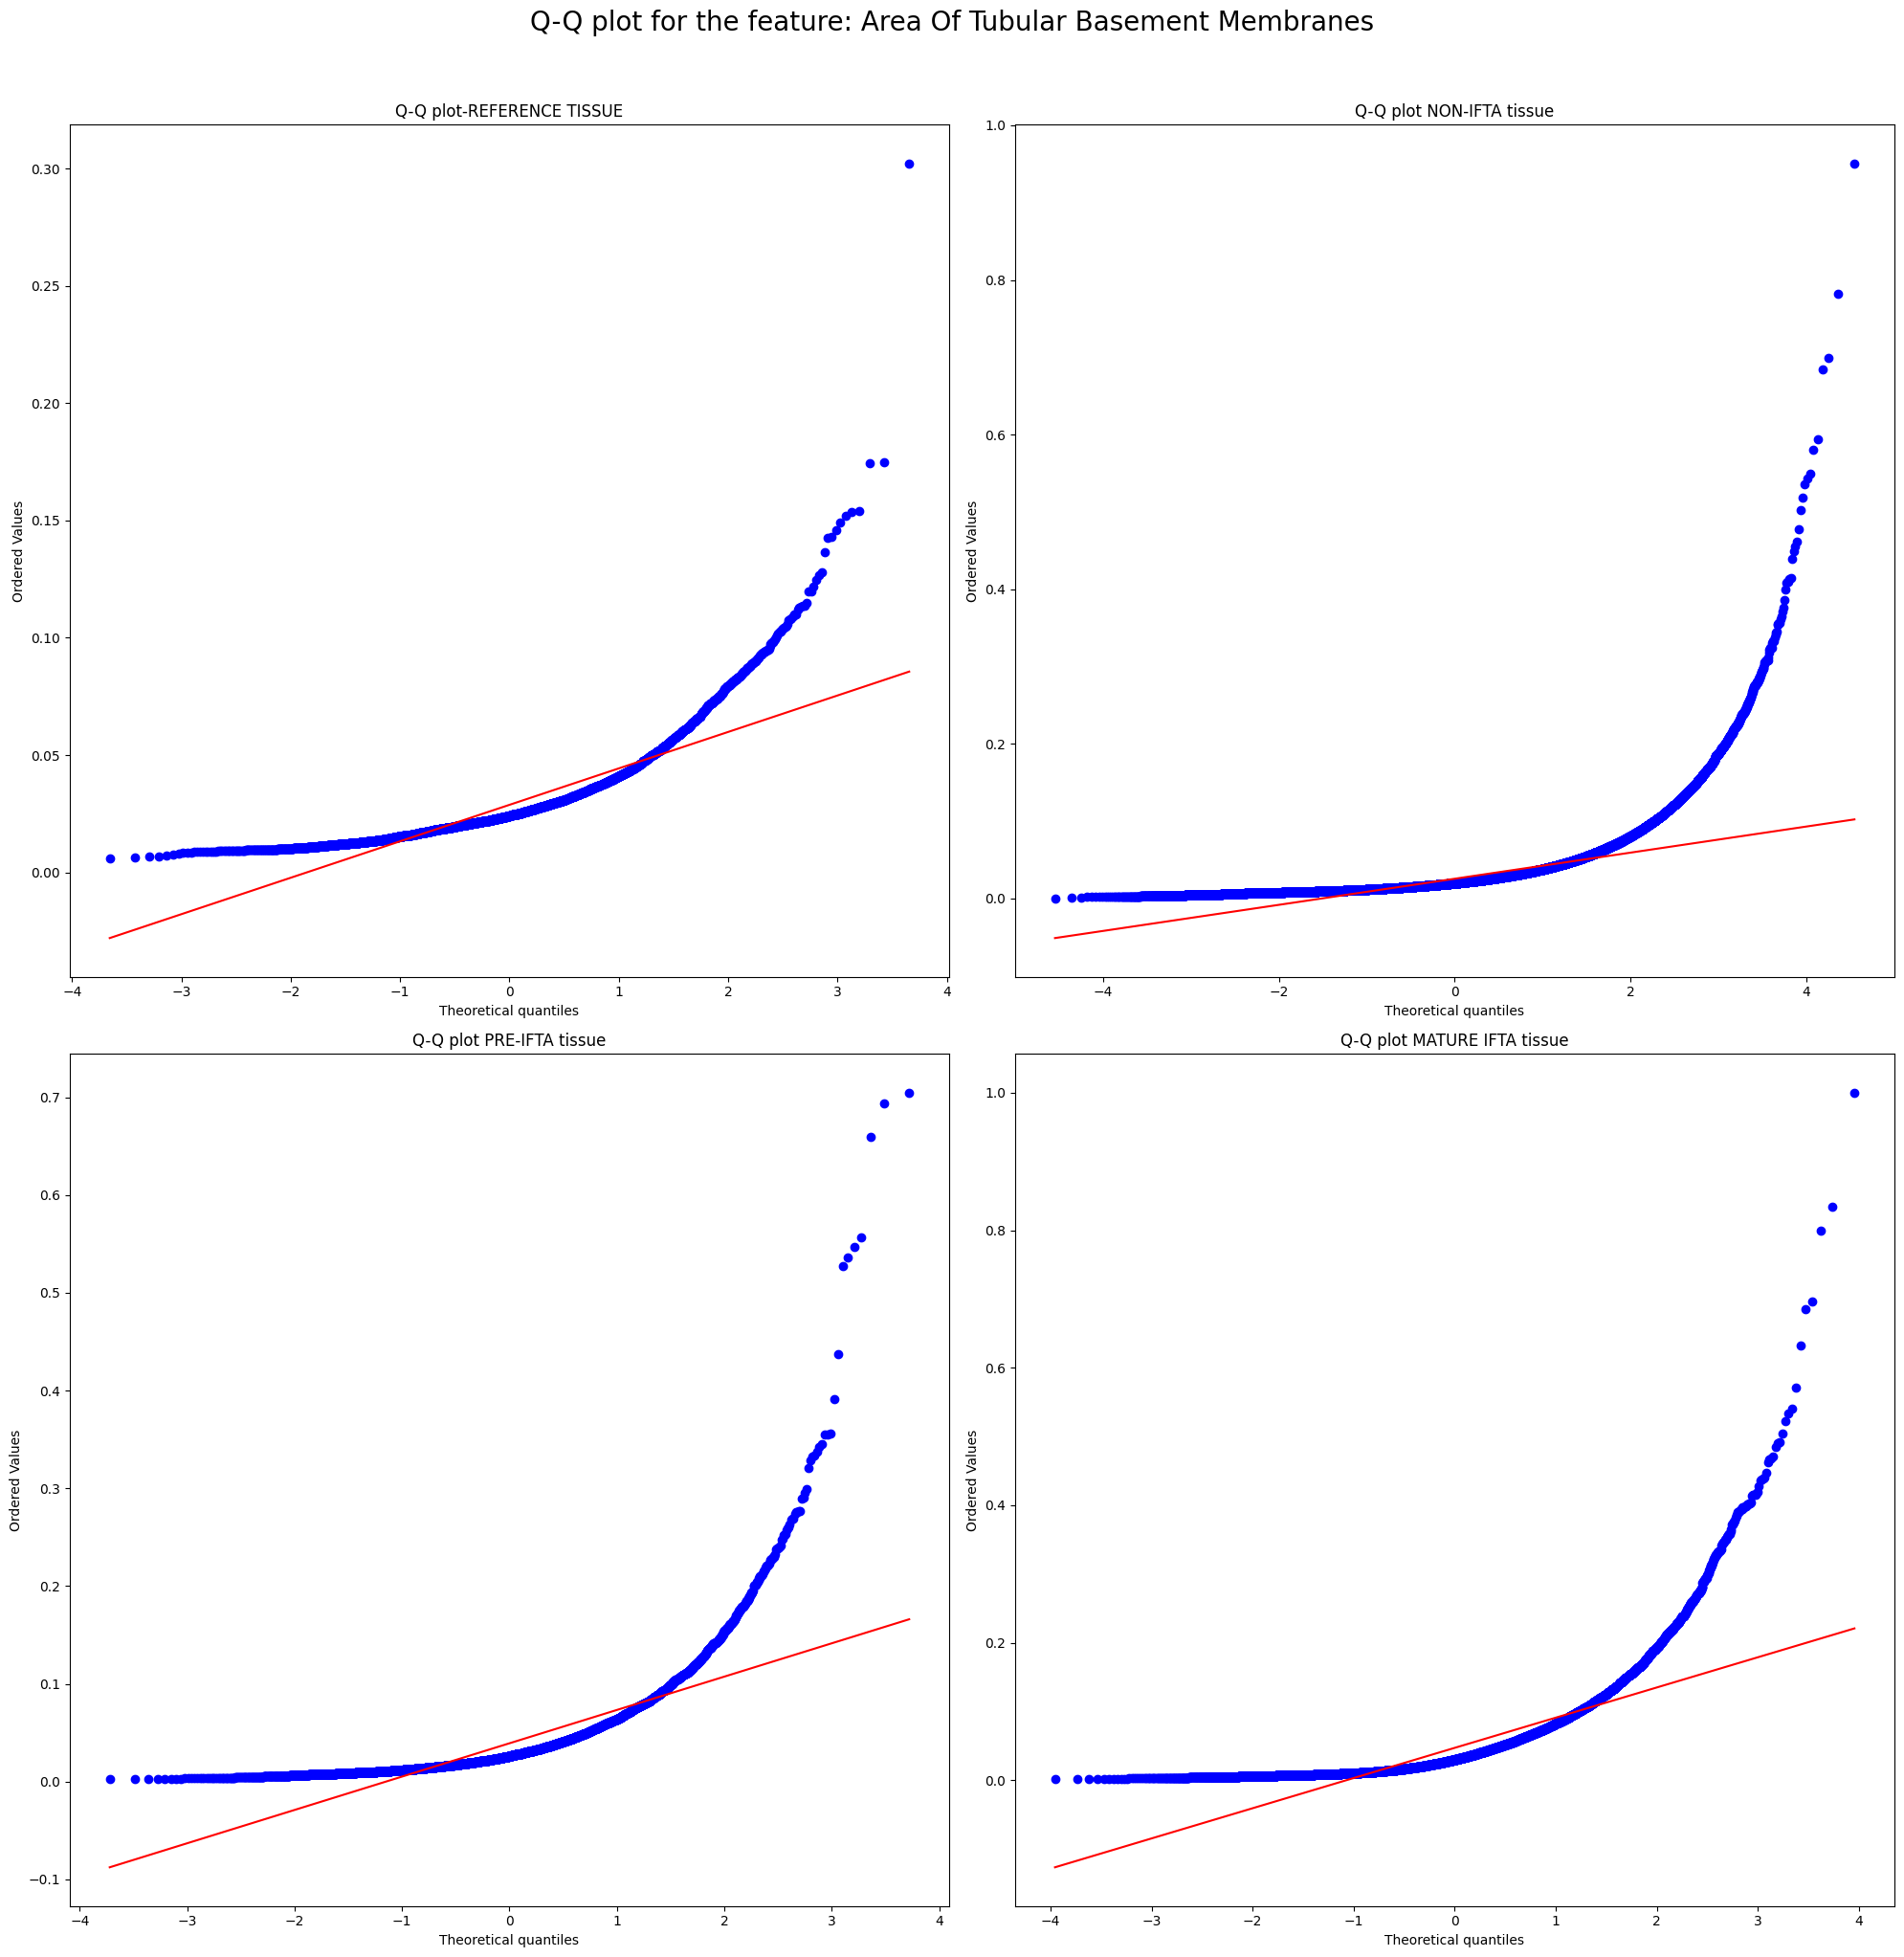

4
Nuclear Area / Tubular Epithelium Area Ratio


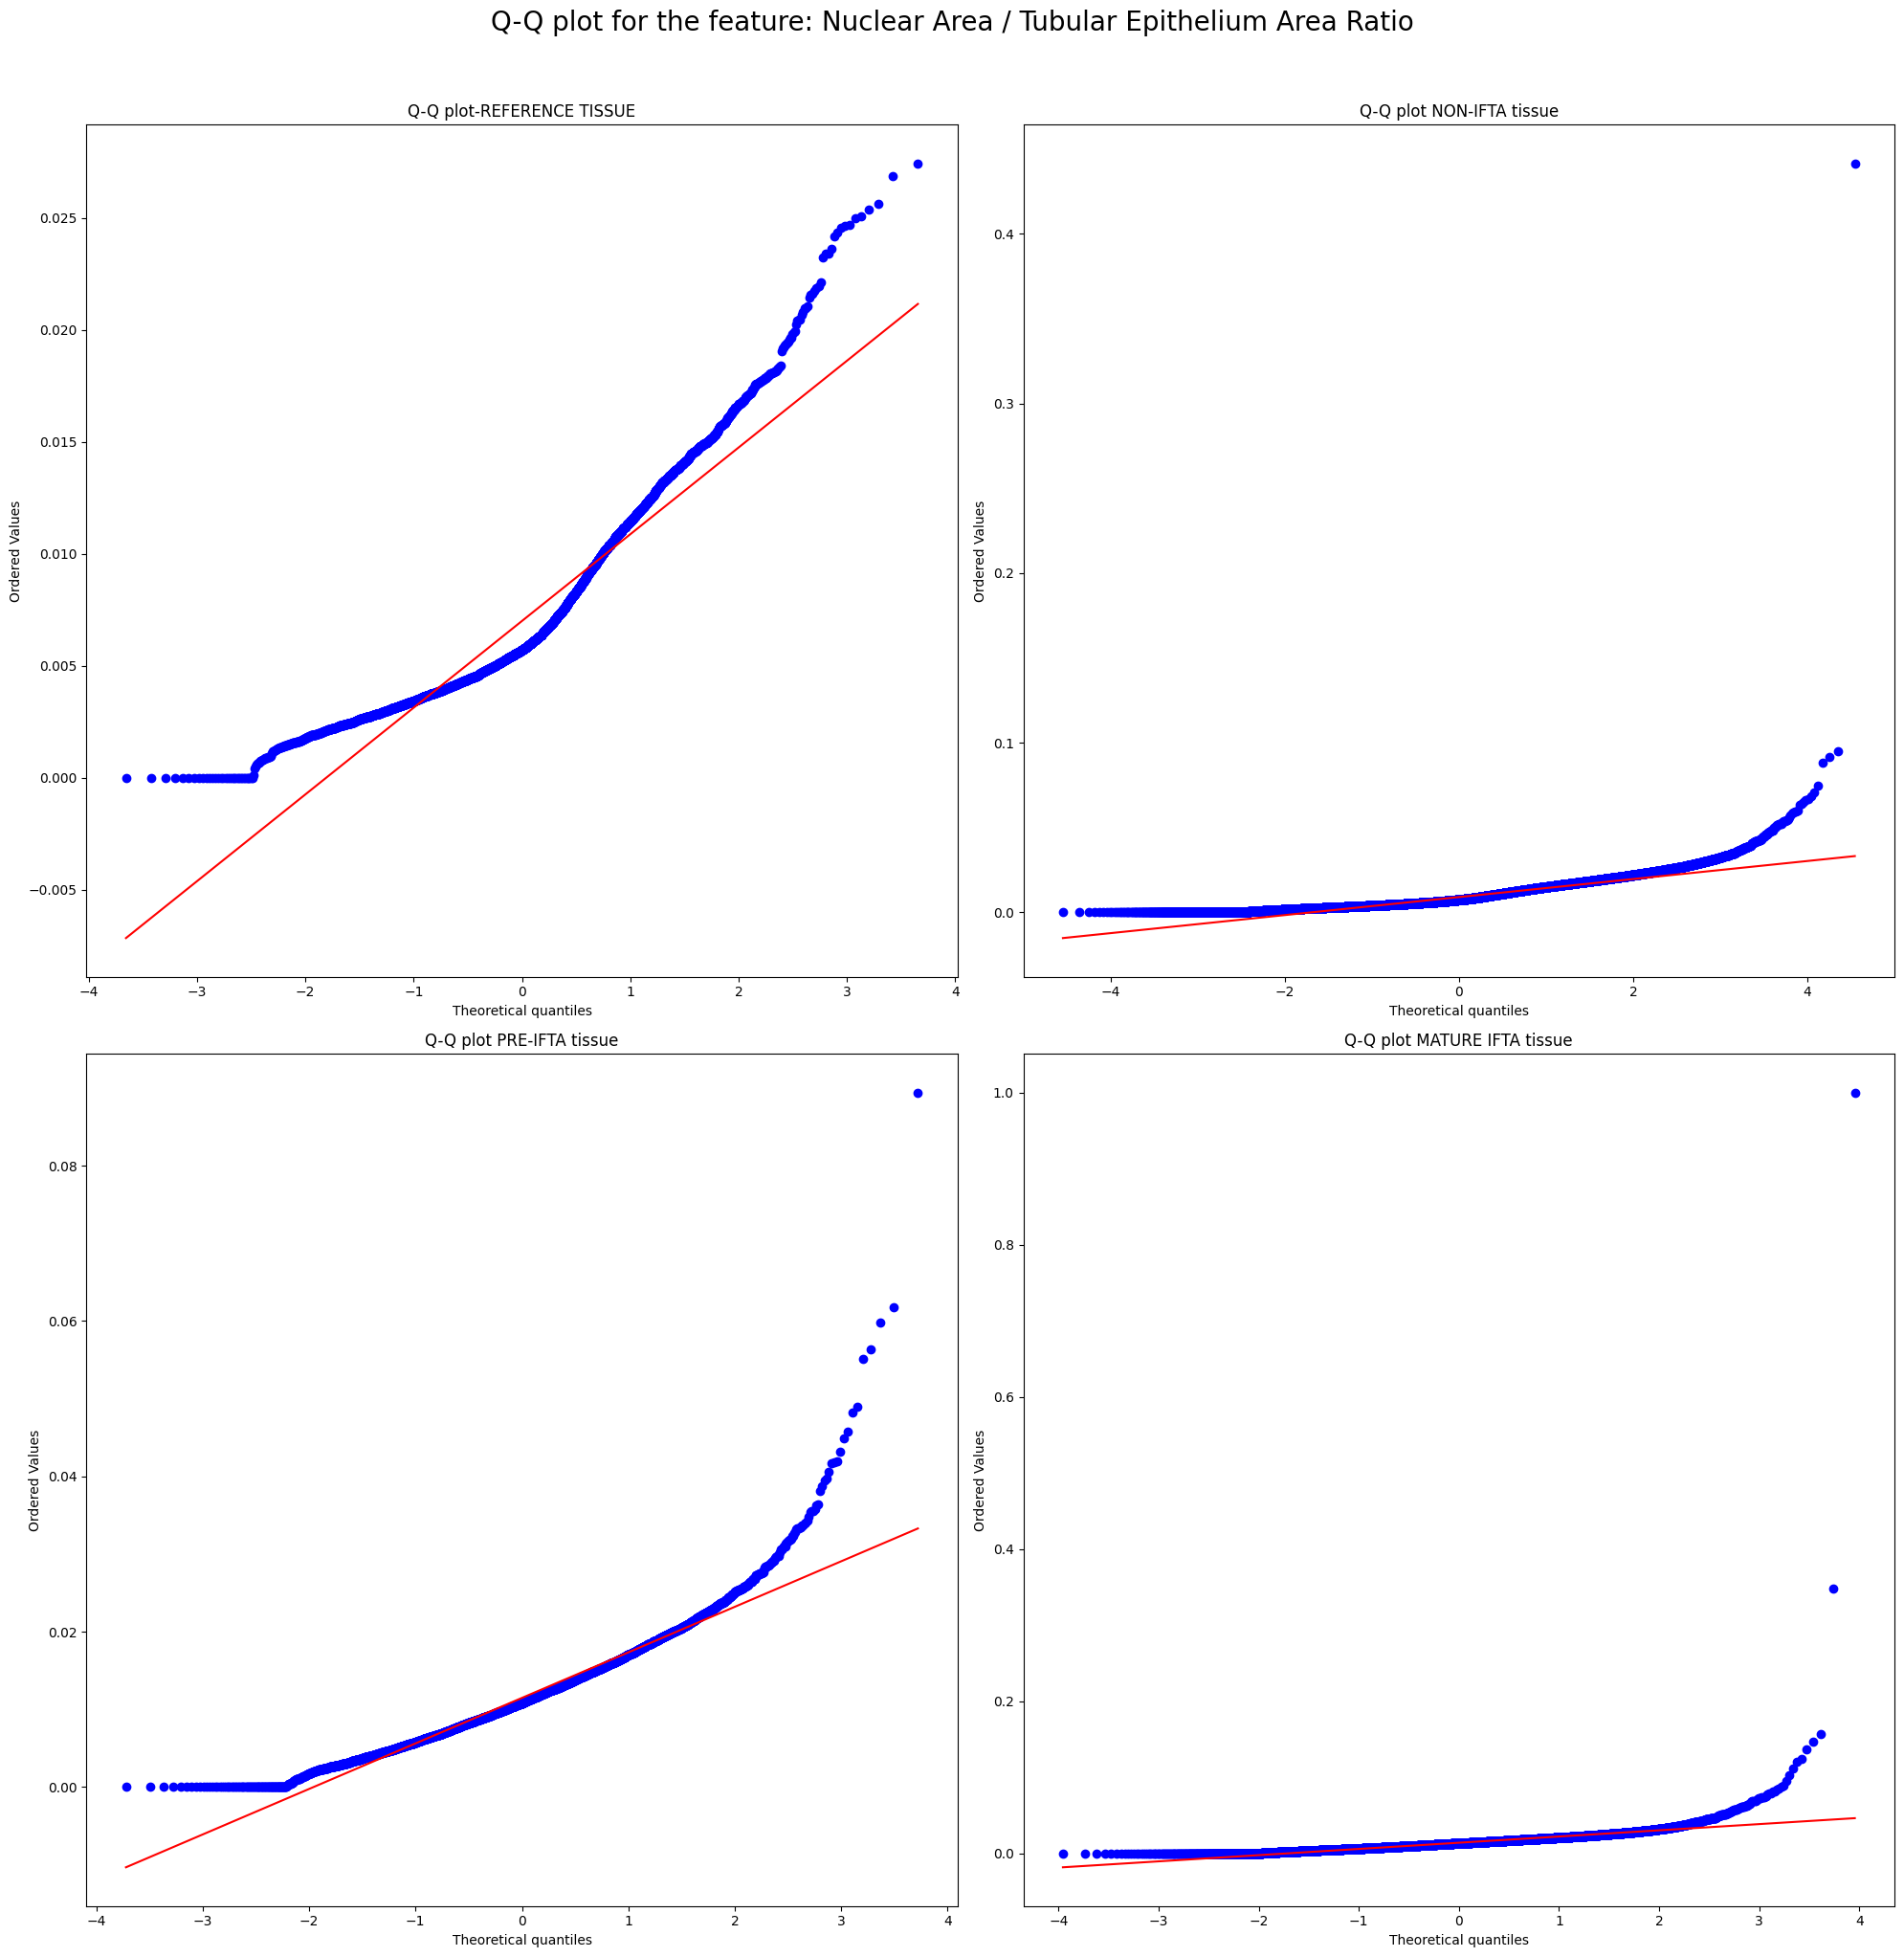

5
Nuclear Area / Tubular Epithelium + Lumen Area Ratio


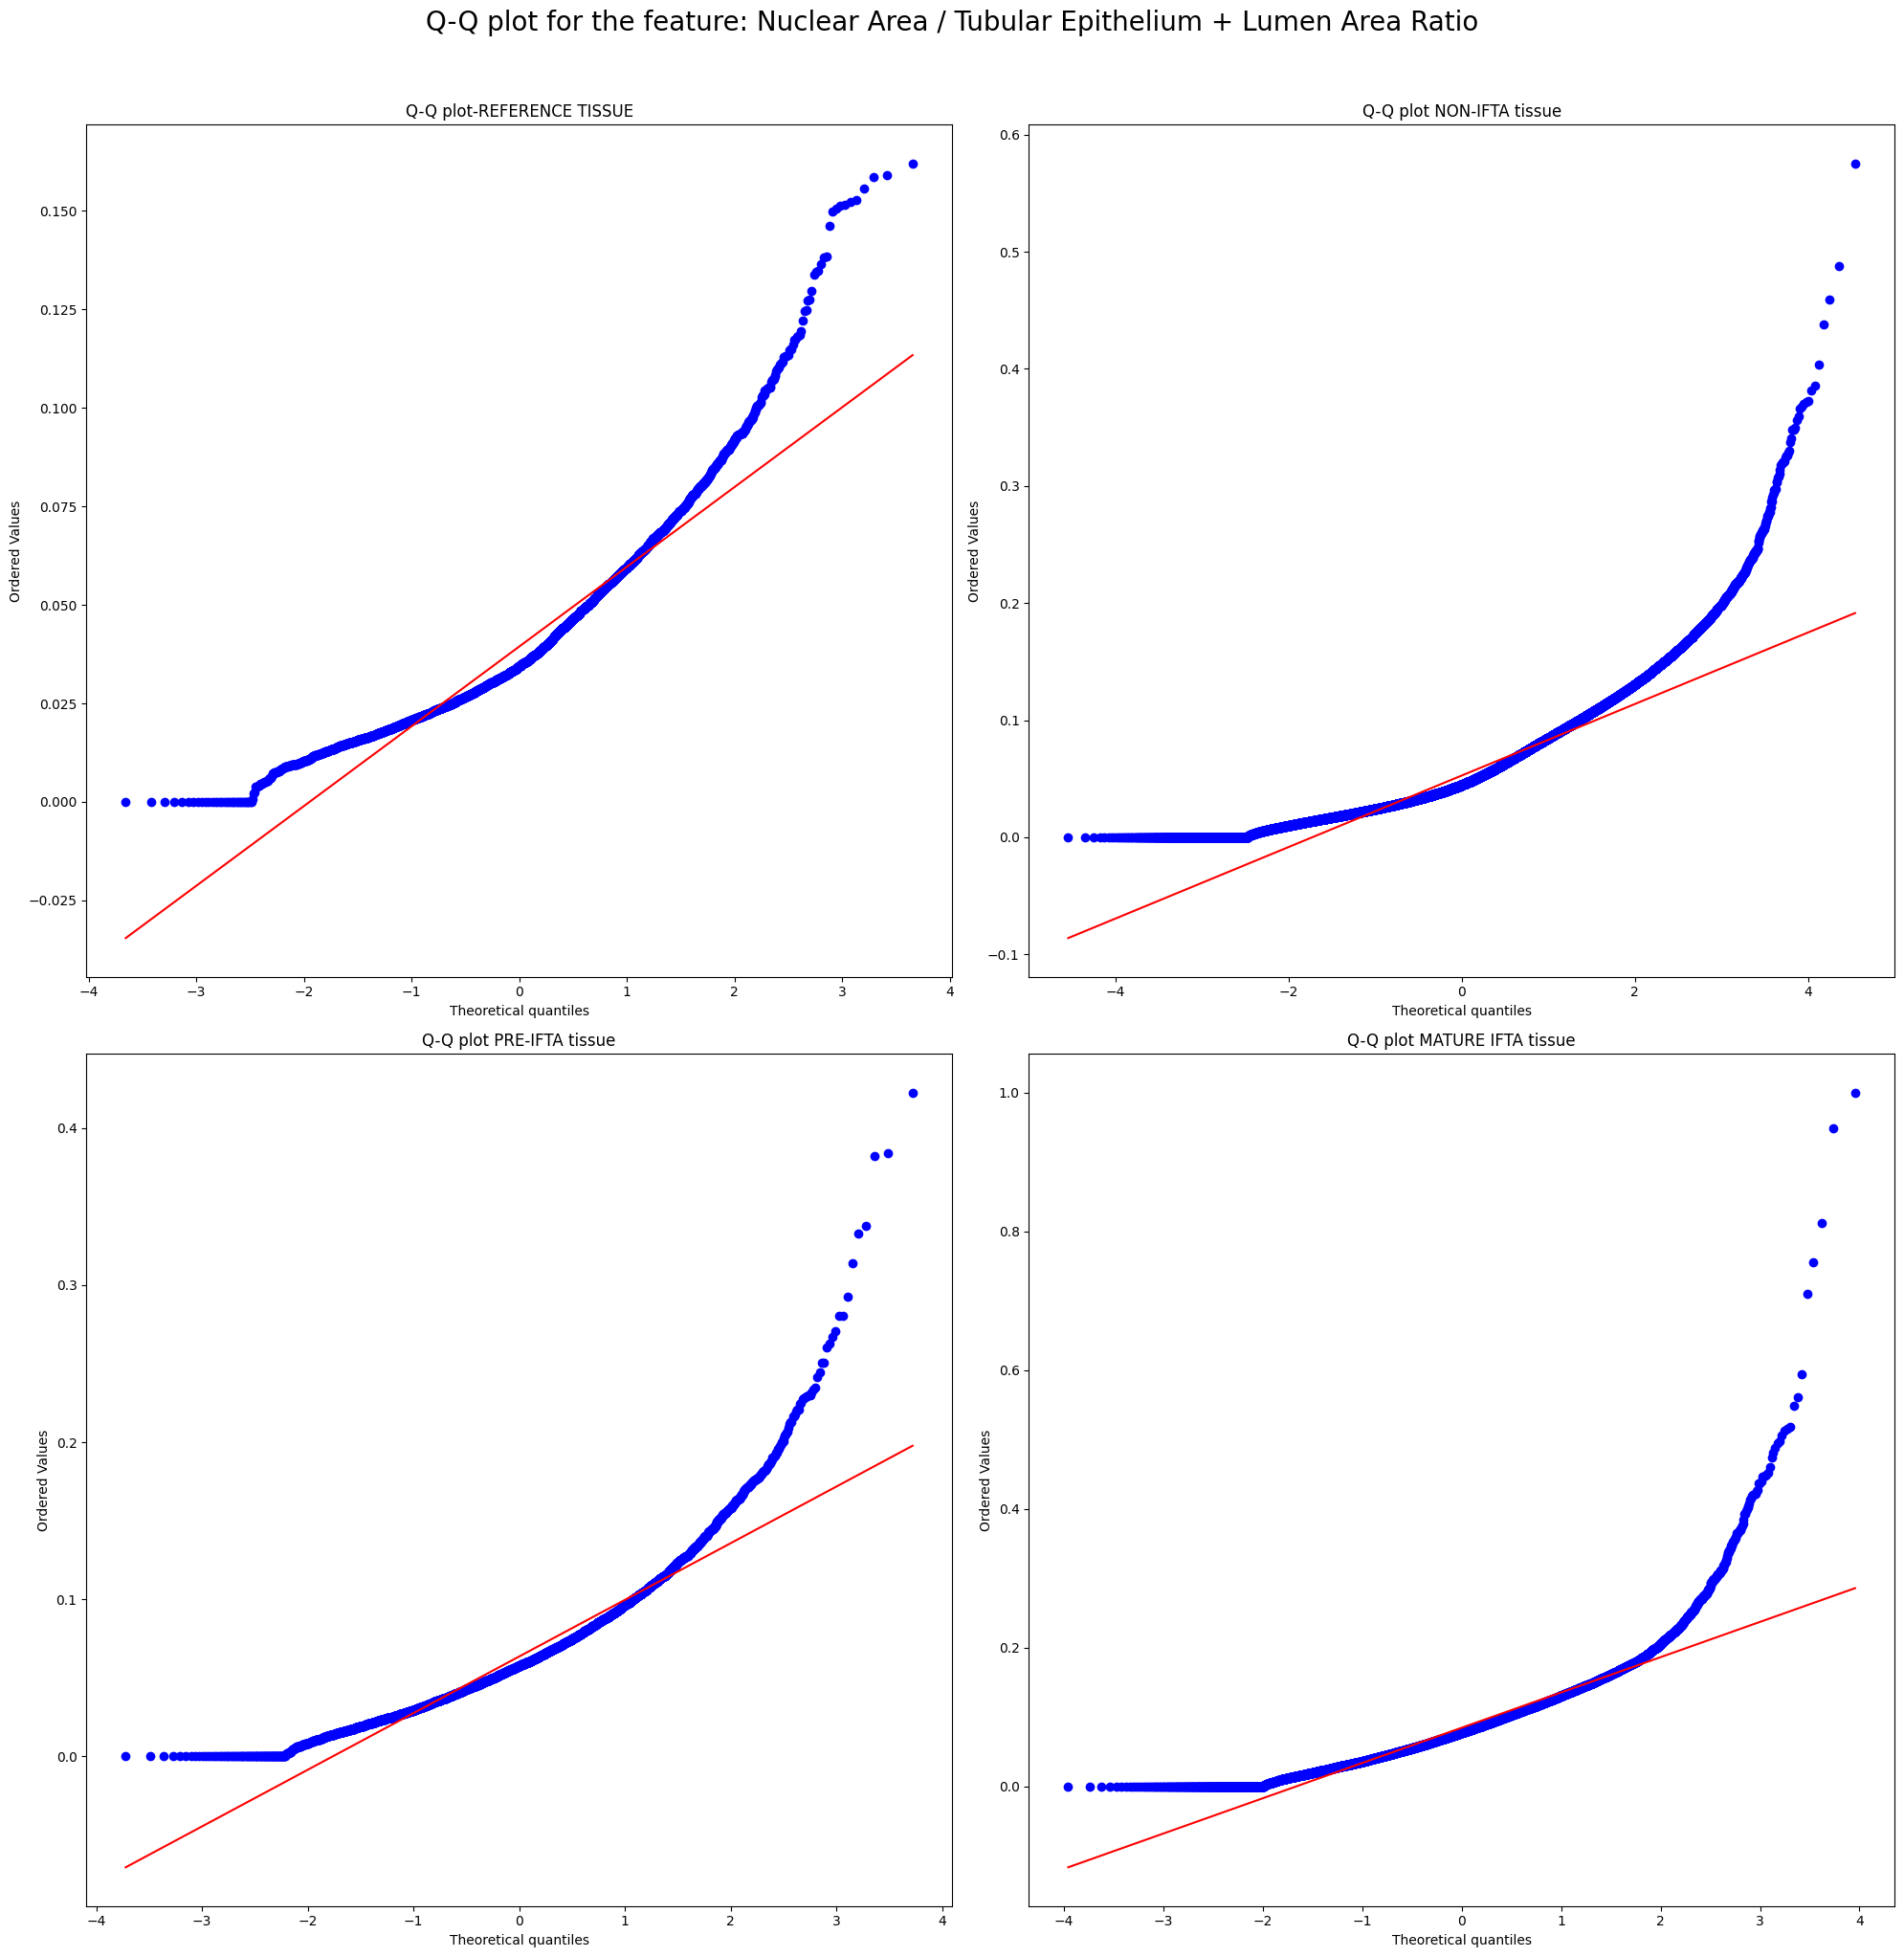

6
Nuclear Area / Tubular Basement Membrane Area Ratio


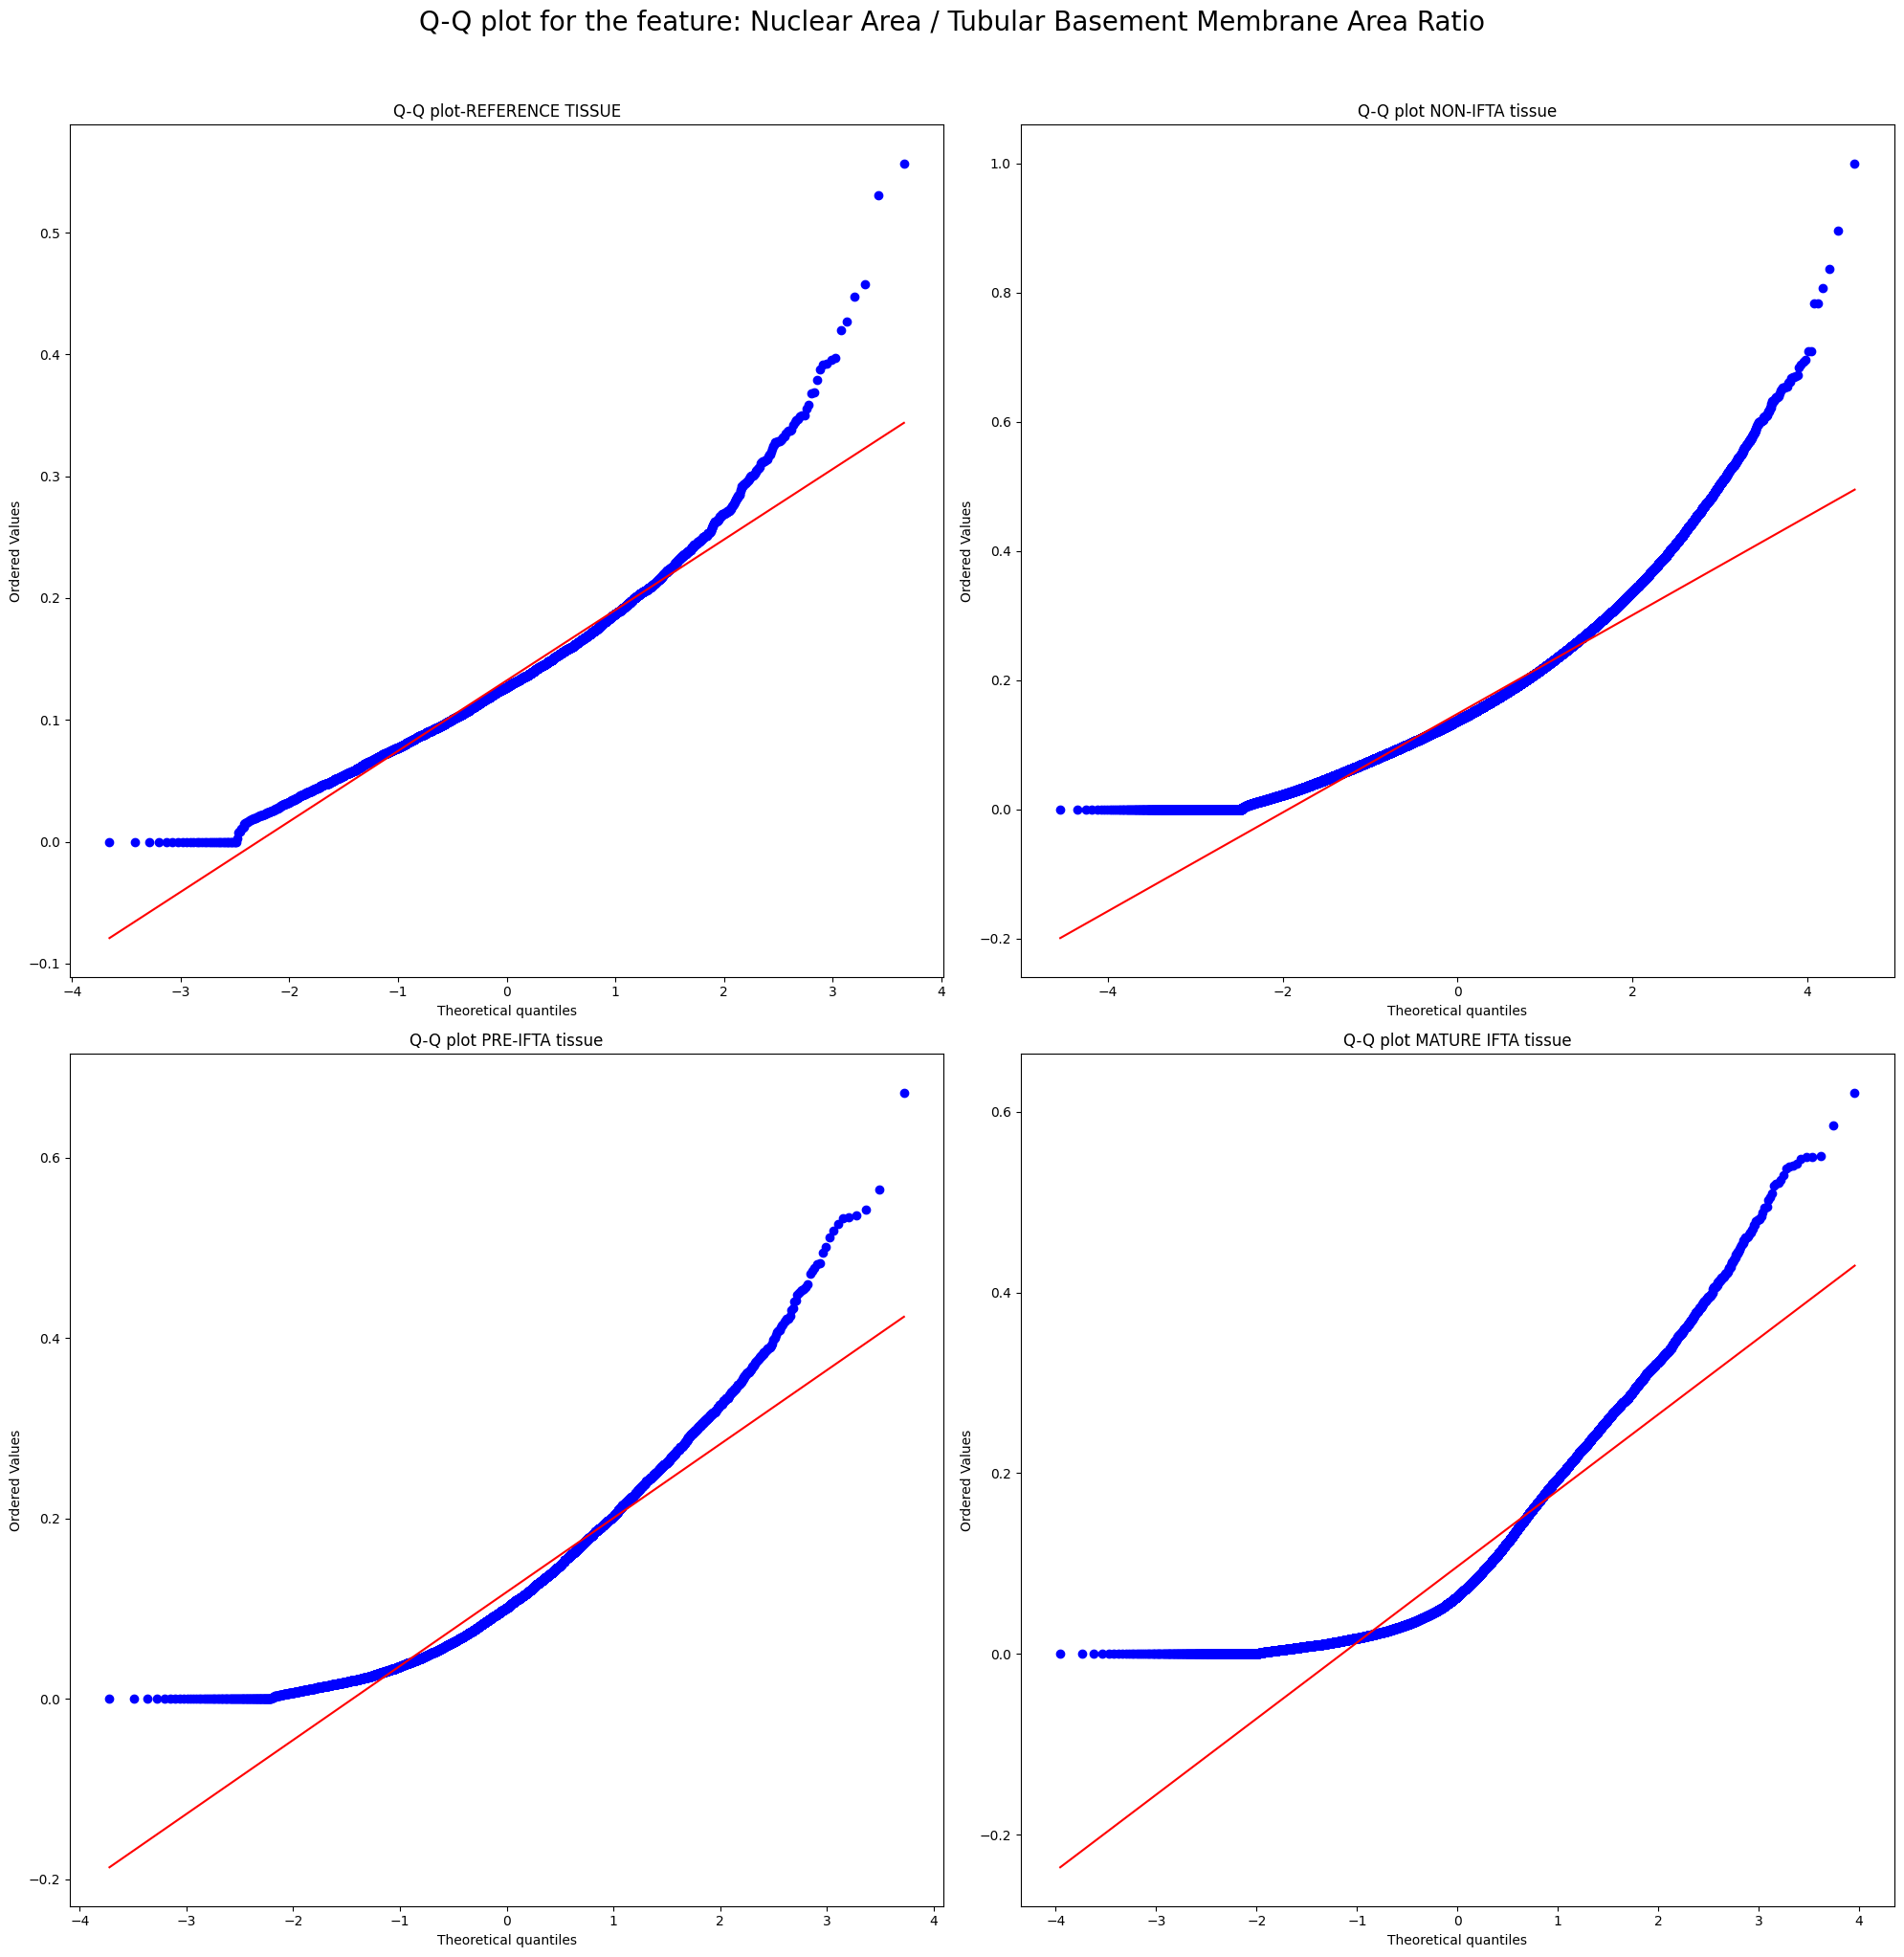

7
Minimal Distance Between Center Of The Nuclei And Border Of The Lumen


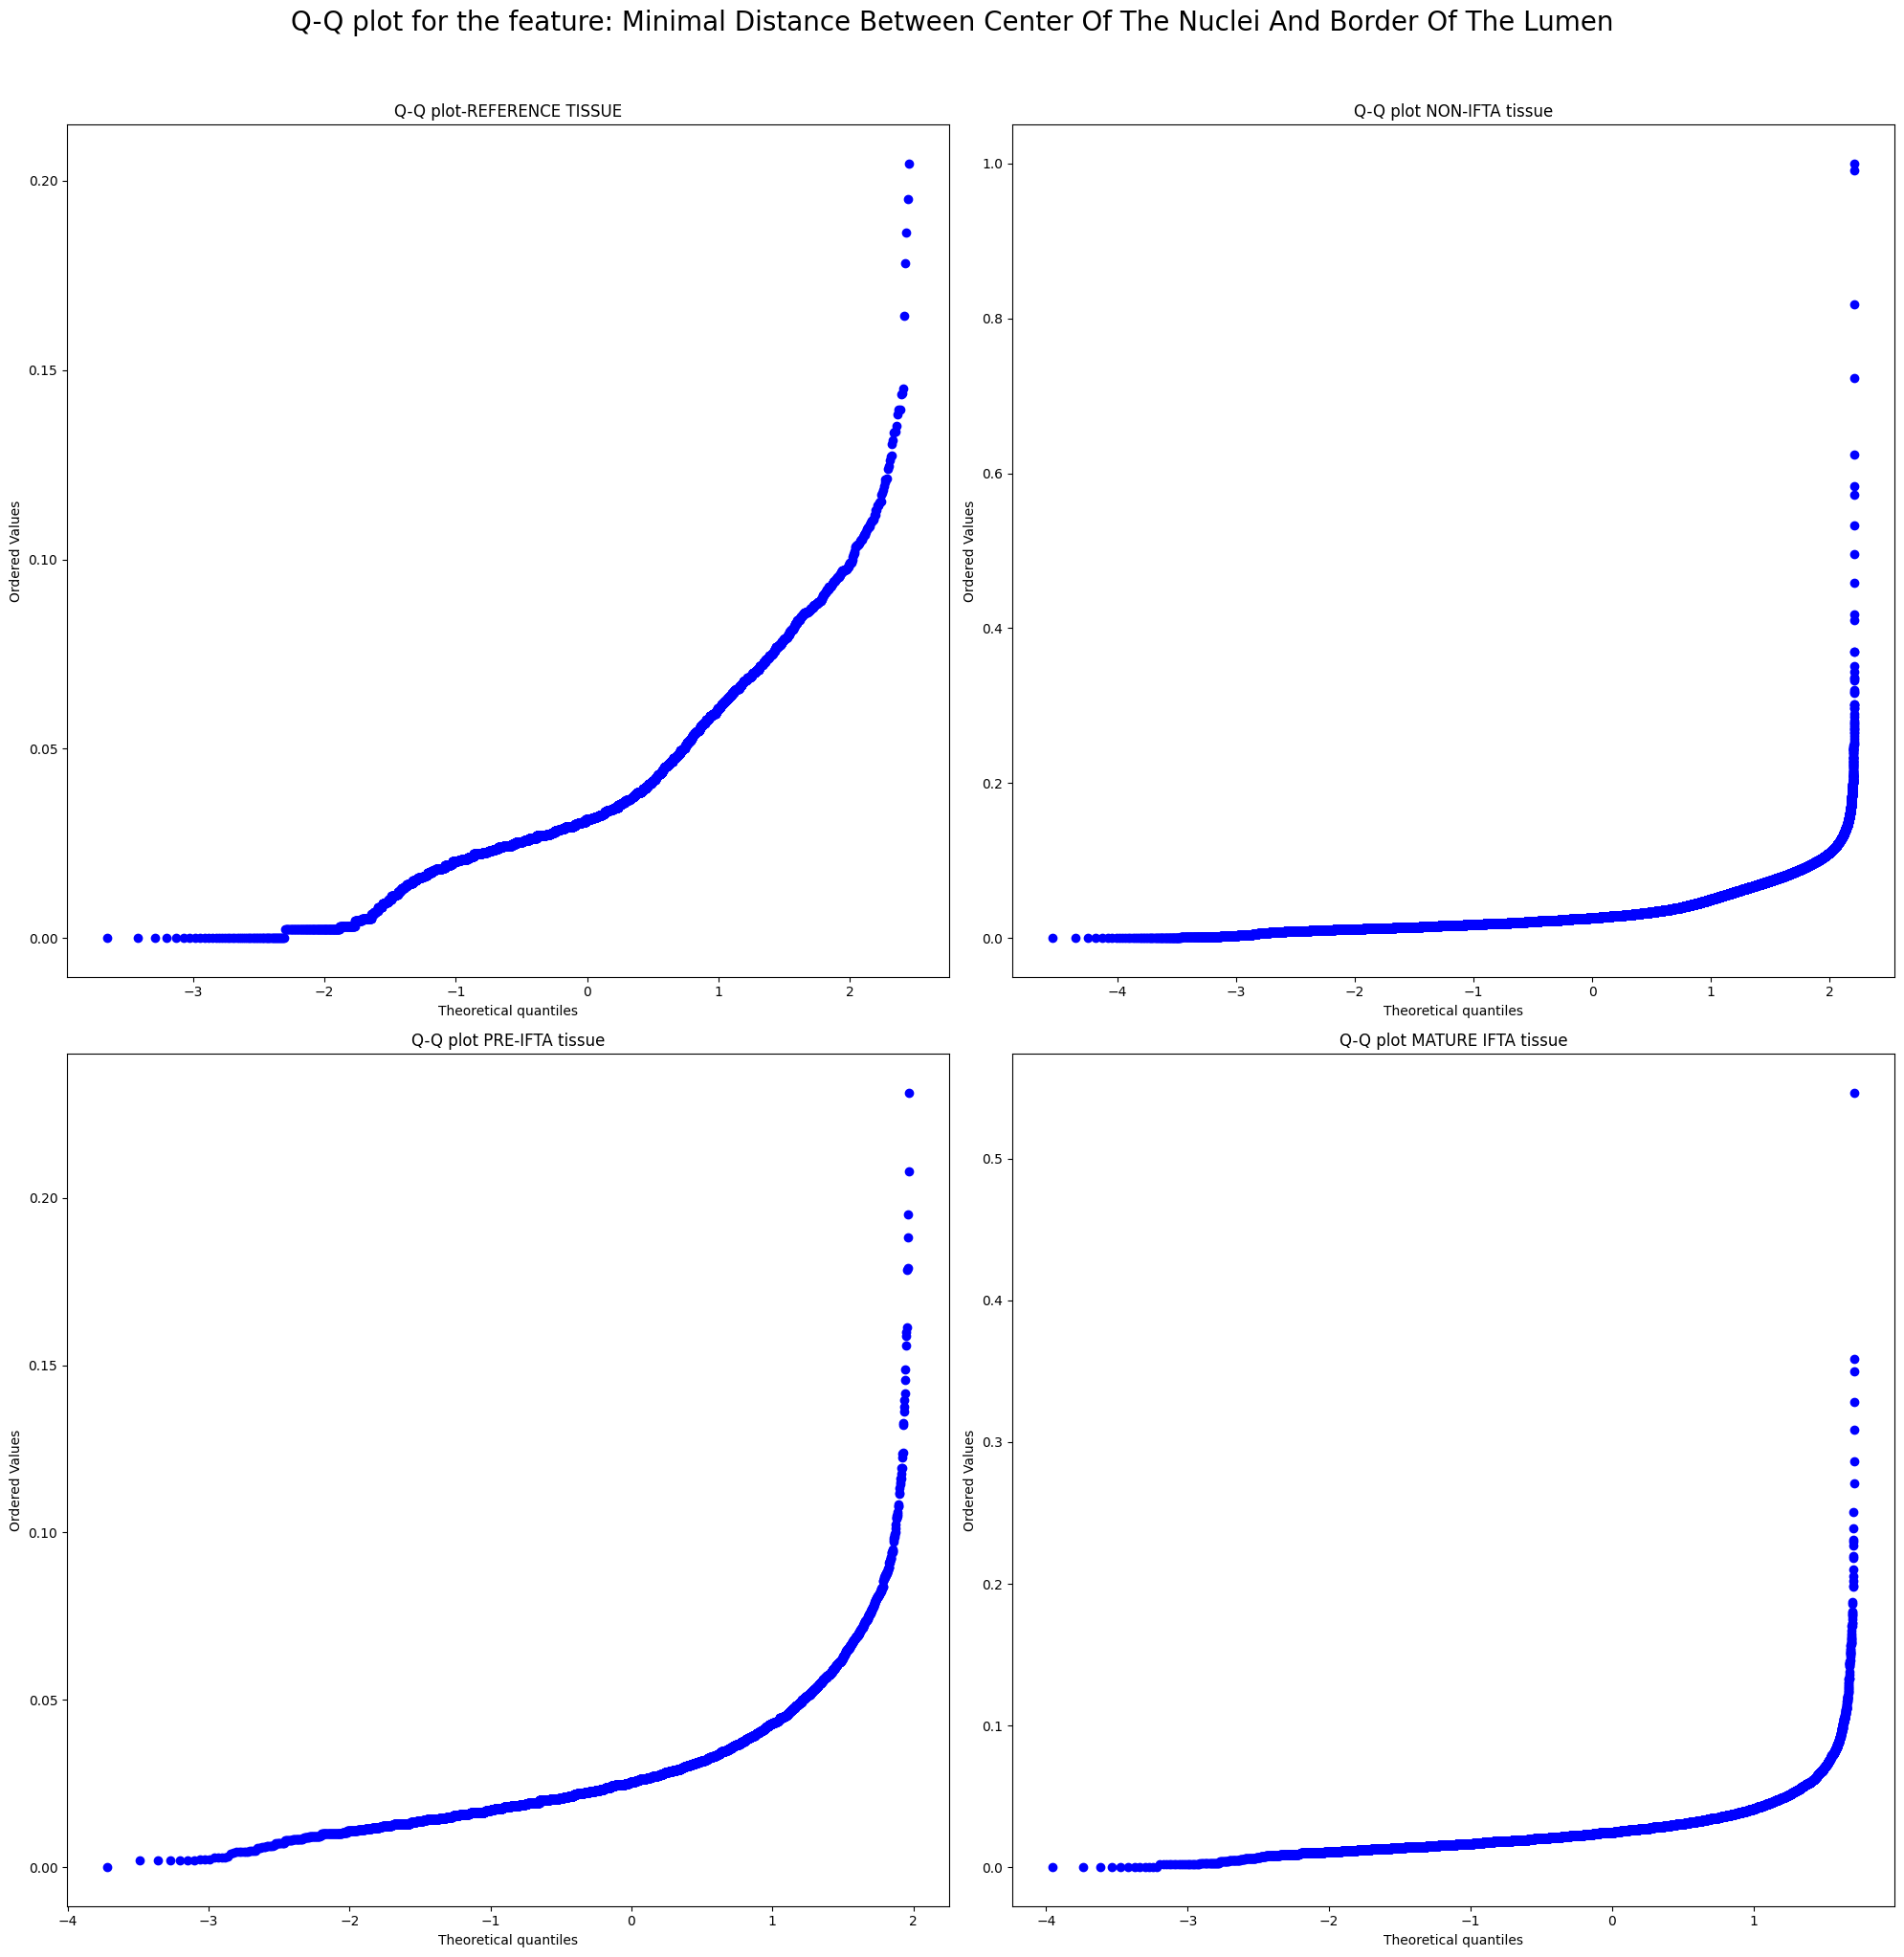

8
Smoothness Of The Outer Border Of The Tubular Epithelium


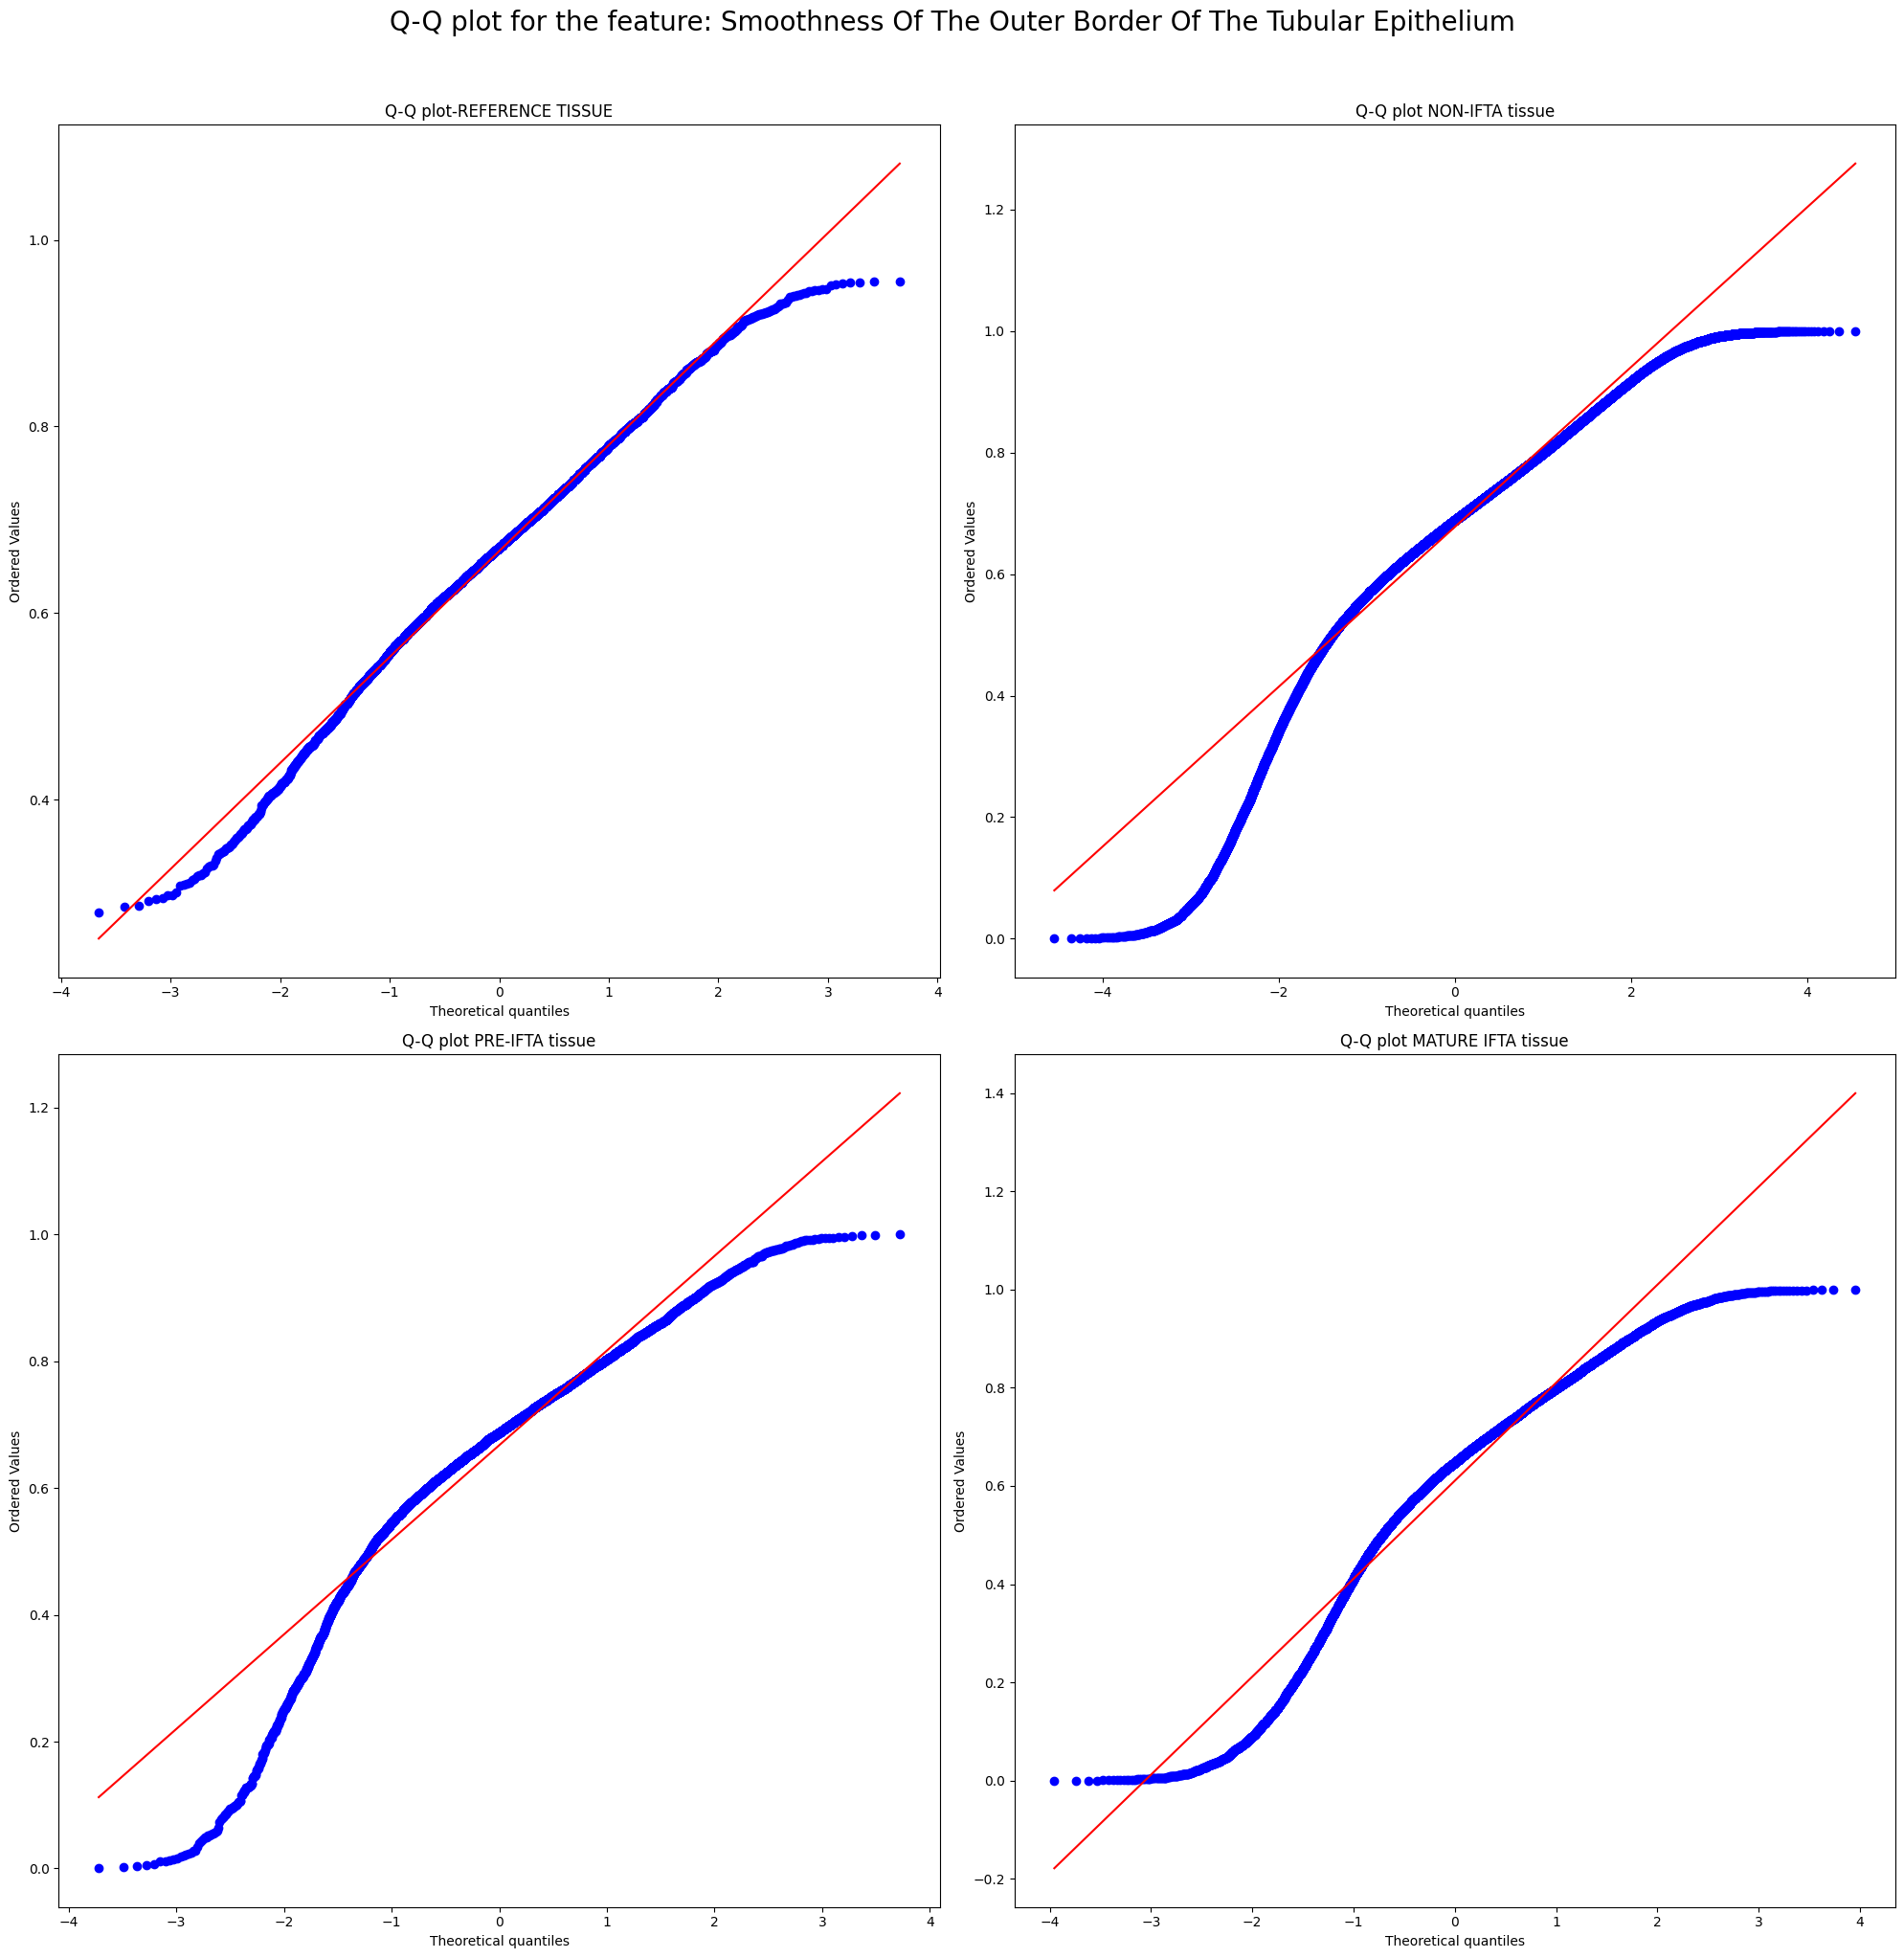

In [24]:
for i in range(len(selected_features_violinplot)):
    print(i)
    feature = selected_features_violinplot[i]
    title = correct_titles[i]
    print(title)
    noifta = list(df_noifta[feature])
    preifta =list(df_preifta[feature])
    matureifta = list(df_matureifta[feature])
    reference = list(df_reference[feature])
    
    plt.figure(figsize=(20, 20))
    
    # Main title for the entire figure
    plt.suptitle(f'Q-Q plot for the feature: {title}', fontsize=20, y=1.02)  # y adjusts vertical position

    plt.subplot(2, 2, 1)
    stats.probplot(reference, dist="norm", plot=plt)
    plt.title(f'Q-Q plot-REFERENCE TISSUE')

    # Q-Q plot for Data2
    plt.subplot(2, 2, 2)
    stats.probplot(noifta, dist="norm", plot=plt)
    plt.title(f'Q-Q plot NON-IFTA tissue')

    plt.subplot(2, 2, 3)
    stats.probplot(preifta, dist="norm", plot=plt)
    plt.title(f'Q-Q plot PRE-IFTA tissue')

    # Q-Q plot for Data2
    plt.subplot(2, 2, 4)
    stats.probplot(matureifta, dist="norm", plot=plt)
    plt.title(f'Q-Q plot MATURE IFTA tissue')

    plt.tight_layout()
    plt.show()

# Statistical test + effect size

In [26]:
for i in range(len(selected_features_violinplot)):
    print(i)
    feature = selected_features_violinplot[i]
    title = correct_titles[i]
    print(title)
    noifta = list(df_noifta[feature])
    preifta =list(df_preifta[feature])
    matureifta = list(df_matureifta[feature])
    reference = list(df_reference[feature])
    stat, p_value = stats.kruskal(reference, noifta, preifta, matureifta)

    # Print the test result
    print(f"Kruskal-Wallis H-statistic: {stat:.3f}, p-value: {p_value:.3f}")

    # Interpret the p-value
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the groups.")
    else:
        print("There is no significant difference between the groups.")

    # Calculate effect size (eta-squared)
    # Formula: η² = H / (N - 1), where H is the Kruskal-Wallis H-statistic, and N is the total number of observations
    N = len(reference) + len(noifta) + len(preifta) + len(matureifta)
    eta_squared = stat / (N - 1)

    print(f"Effect size (eta-squared): {eta_squared:.3f}")

0
Tubular Epithelium Area / Tubular Area Ratio
Kruskal-Wallis H-statistic: 21259.507, p-value: 0.000
There is a significant difference between the groups.
Effect size (eta-squared): 0.075
1
Average Tubular Basement Membrane Thickness
Kruskal-Wallis H-statistic: 25765.327, p-value: 0.000
There is a significant difference between the groups.
Effect size (eta-squared): 0.091
2
Maximum Value For Tubular Basement Membrane Thickness
Kruskal-Wallis H-statistic: 21773.468, p-value: 0.000
There is a significant difference between the groups.
Effect size (eta-squared): 0.077
3
Area Of Tubular Basement Membranes
Kruskal-Wallis H-statistic: 4122.378, p-value: 0.000
There is a significant difference between the groups.
Effect size (eta-squared): 0.015
4
Nuclear Area / Tubular Epithelium Area Ratio
Kruskal-Wallis H-statistic: 10888.573, p-value: 0.000
There is a significant difference between the groups.
Effect size (eta-squared): 0.039
5
Nuclear Area / Tubular Epithelium + Lumen Area Ratio
Kruskal-

In [ ]:
# selected_features_violinplot = ['TE_TUBULE_AREA_RATIO']
for i in range(len(selected_features_violinplot)):
    print(i)
    feature = selected_features_violinplot[i]
    title = correct_titles[i]

# for feature in selected_features_violinplot:
#     print()    
    noifta = list(df_noifta[feature])
    preifta =list(df_preifta[feature])
    matureifta = list(df_matureifta[feature])
    reference = list(df_reference[feature])
    # Combine the lists into a DataFrame for plotting
    data_sub_cortical = pd.DataFrame({
        "Value": np.concatenate([reference,noifta, preifta,matureifta]),
        "Cortical sub-region": 
        ["REFERENCE_TISSUE"] * len(reference)+
        ["NON-IFTA"] * len(noifta) + 
        ["PRE-IFTA"] * len(preifta)+
        ["MATURE IFTA"]*len(matureifta)
    })
    plt.figure(figsize=(10, 6))
    sns.violinplot(x="Cortical sub-region", y="Value", data=data_sub_cortical,palette=custom_palette,alpha=0.5)
    sns.boxplot(x="Cortical sub-region", y="Value", data=data_sub_cortical, width=0.1, linewidth=1.5, palette=custom_palette,fliersize=5)  #
    plt.title(f"{title}",fontsize=25)
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.xticks(fontsize=18) 
    plt.show()

In [ ]:
# selected_features_violinplot = ['TE_TUBULE_AREA_RATIO']
for i in range(len(selected_features_violinplot)):
    print(i)
    feature = selected_features_violinplot[i]
    title = correct_titles[i]

# for feature in selected_features_violinplot:
#     print()

    
    
    noifta = list(df_noifta[feature])
    preifta =list(df_preifta[feature])
    matureifta = list(df_matureifta[feature])
    reference = list(df_reference[feature])
    # Combine the lists into a DataFrame for plotting
    data_sub_cortical = pd.DataFrame({
        "Value": np.concatenate([reference,noifta, preifta,matureifta]),
        "Cortical sub-region": 
        ["REFERENCE_TISSUE"] * len(reference)+
        ["NON-IFTA"] * len(noifta) + 
        ["PRE-IFTA"] * len(preifta)+
        ["MATURE IFTA"]*len(matureifta)
    })
    plt.figure(figsize=(10, 6))
    sns.violinplot(x="Cortical sub-region", y="Value", data=data_sub_cortical,palette=custom_palette,alpha=0.5)
    sns.boxplot(x="Cortical sub-region", y="Value", data=data_sub_cortical, width=0.1, linewidth=1.5, palette=custom_palette,fliersize=5)  #
    plt.title(f"{title}",fontsize=25)
    plt.ylabel(" ")
    plt.xlabel(" ")
    plt.xticks(fontsize=18) 
    plt.show()

In [27]:
!pip install mplstereonet

     |████████████████████████████████| 1.7 MB 14.3 MB/s eta 0:00:01
  Created wheel for mplstereonet: filename=mplstereonet-0.6.3-py3-none-any.whl size=38341 sha256=2ae6f294cb126fe8c213d9bec2556005ea352f7e5d2a83925eed87bbe2dffc44
  Stored in directory: /home/ffan4/.cache/pip/wheels/dc/6e/3f/de2b2cfd1306a49dbc278f8c049a90702bd6657f751be816e2
Successfully built mplstereonet


In [48]:
# selected_features_violinplot = ['TE_TUBULE_AREA_RATIO']
with pd.ExcelWriter('output_cliffs_delta.xlsx', engine='xlsxwriter') as writer:
    for i in range(1):
        print(i)

        ref_list = []
        no_list = []
        pre_list =[]
        mature_list = []
        feature = selected_features_violinplot[i+7]
        title = correct_titles[i+7]

        noifta = [x for x in list(df_noifta[feature]) if pd.notna(x)]
        preifta = [x for x in list(df_preifta[feature]) if pd.notna(x)]
        matureifta = [x for x in list(df_matureifta[feature]) if pd.notna(x)]
        reference = [x for x in list(df_reference[feature]) if pd.notna(x)]
        groups = [reference, noifta, preifta, matureifta]

        # Example: Assuming `reference`, `noifta`, `preifta`, and `matureifta` are your datasets

        # Cliff's Delta for Reference vs No-IFTA
        ref_ref, ref_ref_inter = cliffs_delta(reference, reference)
        ref_no,  ref_no_inter = cliffs_delta(reference, noifta)
        ref_pre, ref_pre_inter = cliffs_delta(reference, preifta)
        ref_mat, ref_mat_inter = cliffs_delta(reference, matureifta)
        ref_list.append(f'{ref_ref:.3f} ({ref_ref_inter})')
        ref_list.append(f'{ref_no:.3f} ({ref_no_inter})')
        ref_list.append(f'{ref_pre:.3f} ({ref_pre_inter})')
        ref_list.append(f'{ref_mat:.3f} ({ref_mat_inter})')

        # Cliff's Delta for Reference vs No-IFTA
        no_ref, no_ref_inter = cliffs_delta(noifta, reference)
        no_no,  no_no_inter = cliffs_delta(noifta, noifta)
        no_pre, no_pre_inter = cliffs_delta(noifta, preifta)
        no_mat, no_mat_inter = cliffs_delta(noifta, matureifta)
        no_list.append(f'{no_ref:.3f} ({no_ref_inter})')
        no_list.append(f'{no_no:.3f} ({no_no_inter})')
        no_list.append(f'{no_pre:.3f} ({no_pre_inter})')
        no_list.append(f'{no_mat:.3f} ({no_mat_inter})')

        pre_ref, pre_ref_inter = cliffs_delta(preifta, reference)
        pre_no,  pre_no_inter = cliffs_delta(preifta, noifta)
        pre_pre, pre_pre_inter = cliffs_delta(preifta, preifta)
        pre_mat, pre_mat_inter = cliffs_delta(preifta, matureifta)
        pre_list.append(f'{pre_ref:.3f} ({pre_ref_inter})')
        pre_list.append(f'{pre_no:.3f} ({pre_no_inter})')
        pre_list.append(f'{pre_pre:.3f} ({pre_pre_inter})')
        pre_list.append(f'{pre_mat:.3f} ({pre_mat_inter})')

        mat_ref, mat_ref_inter = cliffs_delta(matureifta, reference)
        mat_no,  mat_no_inter = cliffs_delta(matureifta, noifta)
        mat_pre, mat_pre_inter = cliffs_delta(matureifta, preifta)
        mat_mat, mat_mat_inter = cliffs_delta(matureifta, matureifta)
        mature_list.append(f'{mat_ref:.3f} ({mat_ref_inter})')
        mature_list.append(f'{mat_no:.3f} ({mat_no_inter})')
        mature_list.append(f'{mat_pre:.3f} ({mat_pre_inter})')
        mature_list.append(f'{mat_mat:.3f} ({mat_mat_inter})')

        data = {
        'Reference': ref_list,
        'No-IFTA': no_list,
        'Pre-IFTA': pre_list,
        'Mature-IFTA': mature_list
        }
        df_combined = pd.DataFrame(data)
        df_combined
#         # Save the DataFrame to a new sheet in the Excel file
#         sheet_name = f'{feature}'  # Custom sheet name for each iteration
#         df_combined.to_excel(writer, sheet_name=sheet_name, index=False)


0


In [49]:
featuredf_combined

NameError: name 'featuredf_combined' is not defined

In [50]:
df_combined

,Reference,No-IFTA,Pre-IFTA,Mature-IFTA
0,0.000 (negligible),-0.194 (small),-0.258 (small),-0.306 (small)
1,0.194 (small),0.000 (negligible),-0.058 (negligible),-0.107 (negligible)
2,0.258 (small),0.058 (negligible),0.000 (negligible),-0.051 (negligible)
3,0.306 (small),0.107 (negligible),0.051 (negligible),0.000 (negligible)
